In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('font', size=18)

## 1. Import study data

In [3]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
ADNIMERGE.head()

RID COLPROT ORIGPROT        PTID  SITE VISCODE    EXAMDATE DX_bl   AGE  \
0     2   ADNI1    ADNI1  011_S_0002    11      bl  2005-09-08    CN  74.3   
1     3   ADNI1    ADNI1  011_S_0003    11      bl  2005-09-12    AD  81.3   
5     4   ADNI1    ADNI1  022_S_0004    22      bl  2005-11-08  LMCI  67.5   
10    5   ADNI1    ADNI1  011_S_0005    11      bl  2005-09-07    CN  73.7   
15    6   ADNI1    ADNI1  100_S_0006   100      bl  2005-11-29  LMCI  80.4   

   PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  PIB  \
0      Male        16  Not Hisp/Latino    White  Married    0.0  1.33615  NaN   
1      Male        18  Not Hisp/Latino    White  Married    1.0  1.10860  NaN   
5      Male        10      Hisp/Latino    White  Married    0.0      NaN  NaN   
10     Male        16  Not Hisp/Latino    White  Married    0.0  1.25956  NaN   
15   Female        13  Not Hisp/Latino    White  Married    0.0      NaN  NaN   

    AV45  FBB  ABETA    TAU   PTAU  CDRSB  ADAS11  ADAS13  ADASQ4  MMSE  \
0    NaN  NaN    NaN    NaN    NaN    0.0   10.67   18.67     5.0  28.0   
1    NaN  NaN  741.5  239.7  22.83    4.5   22.00   31.00     8.0  20.0   
5    NaN  NaN   1501  153.1  13.29    1.0   14.33   21.33     6.0  27.0   
10   NaN  NaN  547.3    337  33.43    0.0    8.67   14.67     4.0  29.0   
15   NaN  NaN    NaN    NaN    NaN    0.5   18.67   25.67     7.0  25.0   

    RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  \
0              44.0             4.0               6.0                54.5455   
1              22.0             1.0               4.0               100.0000   
5              37.0             7.0               4.0                36.3636   
10             37.0             4.0               4.0                44.4444   
15             30.0             1.0               5.0                83.3333   

    LDELTOTAL  DIGITSCOR  TRABSCOR   FAQ  MOCA  EcogPtMem  EcogPtLang  \
0        10.0       34.0     112.0   0.0   NaN        NaN         NaN   
1         2.0       25.0     148.0  10.0   NaN        NaN         NaN   
5         4.0       25.0     271.0   0.0   NaN        NaN         NaN   
10       12.0       38.0      90.0   0.0   NaN        NaN         NaN   
15        3.0       34.0     168.0   0.0   NaN        NaN         NaN   

    EcogPtVisspat  EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  \
0             NaN         NaN          NaN           NaN          NaN   
1             NaN         NaN          NaN           NaN          NaN   
5             NaN         NaN          NaN           NaN          NaN   
10            NaN         NaN          NaN           NaN          NaN   
15            NaN         NaN          NaN           NaN          NaN   

    EcogSPMem  EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  \
0         NaN         NaN            NaN         NaN          NaN   
1         NaN         NaN            NaN         NaN          NaN   
5         NaN         NaN            NaN         NaN          NaN   
10        NaN         NaN            NaN         NaN          NaN   
15        NaN         NaN            NaN         NaN          NaN   

    EcogSPDivatt  EcogSPTotal      FLDSTRENG  \
0            NaN          NaN  1.5 Tesla MRI   
1            NaN          NaN  1.5 Tesla MRI   
5            NaN          NaN  1.5 Tesla MRI   
10           NaN          NaN  1.5 Tesla MRI   
15           NaN          NaN  1.5 Tesla MRI   

                                            FSVERSION  IMAGEUID  Ventricles  \
0   Cross-Sectional FreeSurfer (FreeSurfer Version...   35475.0    118233.0   
1   Cross-Sectional FreeSurfer (FreeSurfer Version...   32237.0     84599.0   
5   Cross-Sectional FreeSurfer (FreeSurfer Version...   64631.0     39605.0   
10  Cross-Sectional FreeSurfer (FreeSurfer Version...   32246.0     34062.0   
15  Cross-Sectional FreeSurfer (FreeSurfer Version...   33025.0     39826.0   

    Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp 

In [4]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## 2. Import genetic clusters

The `sample_id` is equivalent to the `PTID` column in the ADNIMERGE table. This ID will have a `RID` associated.

In [5]:
genetic_clusters_df = pd.read_csv("Genetic-Clusters/clusters_genetics_DEM.csv")
genetic_clusters_df.head()

sample_id  BioGrid_missense  BioGrid_variants  BioGrid_edges_scores  \
0  014_S_4615                 0                 0                     0   
1  128_S_1407                 2                 0                     3   
2  033_S_0922                 0                 0                     0   
3  127_S_0925                 0                 0                     0   
4  141_S_1255                 0                 0                     0   

   STRING_missense  STRING_variants  STRING_edges_scores  SNAP_brain_missense  \
0                1                0                    1                    0   
1                0                0                    0                    0   
2                0                0                    0                    0   
3                0                0                    0                    1   
4                0                1                    0                    0   

   SNAP_brain_variants  SNAP_brain_edges_scores  GIANT_brain_missense  \
0                    0                        0                     1   
1                    1                        1                     1   
2                    0                        1                     1   
3                    1                        1                     1   
4                    0                        1                     1   

   GIANT_brain_variants  GIANT_brain_edges_scores  
0                     1                         2  
1                     2                         1  
2                     0                         3  
3                     1                         1  
4                     2                         0

In [6]:
print("Total number of subjects: ", genetic_clusters_df.shape[0])

Total number of subjects:  252


We are going to create a new column with the `RID`. 

In [7]:
genetic_clusters_df = pd.merge(ADNIMERGE[['PTID', 'RID']], genetic_clusters_df, how='inner', 
                               left_on = 'PTID', right_on = 'sample_id')
genetic_clusters_df.head()

PTID  RID   sample_id  BioGrid_missense  BioGrid_variants  \
0  023_S_0042   42  023_S_0042                 2                 2   
1  099_S_0051   51  099_S_0051                 2                 2   
2  023_S_0061   61  023_S_0061                 2                 1   
3  007_S_0101  101  007_S_0101                 2                 2   
4  123_S_0106  106  123_S_0106                 2                 1   

   BioGrid_edges_scores  STRING_missense  STRING_variants  \
0                     3                0                0   
1                     3                0                0   
2                     3                0                1   
3                     3                0                0   
4                     3                0                1   

   STRING_edges_scores  SNAP_brain_missense  SNAP_brain_variants  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    1   
3                    0                    1                    1   
4                    1                    0                    0   

   SNAP_brain_edges_scores  GIANT_brain_missense  GIANT_brain_variants  \
0                        1                     1                     1   
1                        1                     0                     2   
2                        1                     1                     0   
3                        1                     0                     0   
4                        1                     1                     0   

   GIANT_brain_edges_scores  
0                         1  
1                         2  
2                         0  
3                         4  
4                         4

In addition, we are going to count how many clusters are there for each variable.

In [8]:
cluster_variables = genetic_clusters_df.columns[3:]
for variable in cluster_variables:
    n_clusters = len(genetic_clusters_df[variable].unique())
    print("Number of clusters", n_clusters)

Number of clusters 3
Number of clusters 3
Number of clusters 4
Number of clusters 2
Number of clusters 3
Number of clusters 4
Number of clusters 2
Number of clusters 2
Number of clusters 3
Number of clusters 2
Number of clusters 3
Number of clusters 5


## 3. Import neurocognitive test batteries

### 3.1. ADAS-cog

In [9]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
ADAS.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  \
5   ADNIGO  22  2002      48      bl       bl  2010-07-06  2011-02-28   
6   ADNIGO  24  2007      12      bl       bl  2010-07-07  2011-02-28   
7   ADNIGO  26  2010       1      bl       bl  2010-07-09  2011-02-28   
10  ADNIGO  32  2011      48      bl       bl  2010-07-21  2011-02-28   
13  ADNIGO  38  2003      48      bl       bl  2010-07-23  2011-02-28   

    WORDLIST  Q1UNABLE          Q1TR1                Q1TR2              Q1TR3  \
5        1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9  0:2:3:4:5:6:7:8:9   
6        1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9  0:2:3:4:5:6:7:8:9   
7        1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9    0:1:2:3:5:6:8:9   
10       1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9    0:1:2:3:4:5:8:9   
13       1.0       NaN        0:3:6:9        0:1:2:4:5:6:9    0:1:2:4:5:6:8:9   

    Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE     Q2TASK  Q2SCORE  \
5      NaN     NaN    NaN      1.0      NaN       NaN  1:2:3:4:5      0.0   
6      NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
7      NaN     NaN    NaN      2.0      NaN       NaN  1:2:3:4:5      0.0   
10     NaN     NaN    NaN      3.0      NaN       NaN  1:2:3:4:5      0.0   
13     NaN     NaN    NaN      4.0      NaN       NaN  1:2:3:4:5      0.0   

    Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  Q4UNABLE  \
5        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
6        NaN      1.0      1.0      1.0      2.0      1.0       NaN   
7        NaN      1.0      1.0      1.0      1.0      0.0       NaN   
10       NaN      1.0      1.0      1.0      2.0      1.0       NaN   
13       NaN      1.0      1.0      1.0      2.0      1.0       NaN   

    TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
5         NaN  0:1:3:4:6:7:8:9      2.0       NaN   
6         NaN  0:1:2:4:5:6:7:8      2.0       NaN   
7         NaN    0:1:2:4:5:7:9      3.0       NaN   
10        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
13        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                       Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
5      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
6      1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
7   1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
10  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
13     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

    Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
6       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
7       NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
10      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
13      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

    Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
5        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
6        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
7        NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
10       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
13       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

    Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
5        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
6        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
7        NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
10       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
13       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0  

Count missing data

In [10]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Number of rows with missing values:  13
Total number of tests:  13


There are only 13 subjects that have missing data in any test. 

In [11]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
print("Number of subjects that have completed all tests: ", ADAS.shape[0])

Number of subjects that have completed all tests:  1593


### 3.2. MMSE

In [12]:
#MMSE (ADNI1,GO,2,3)
MMSE = pd.read_csv("Neuropsychological/MMSE.csv",low_memory=False)
MMSE = MMSE[MMSE['VISCODE2']=='sc']
MMSE.head()

Phase  ID  RID  SITEID VISCODE VISCODE2    USERDATE USERDATE2    EXAMDATE  \
0  ADNI1  10    2     107      sc       sc  2005-08-17       NaN  2005-08-17   
2  ADNI1  14    3     107      sc       sc  2005-08-18       NaN  2005-08-18   
3  ADNI1  16    4      10      sc       sc  2005-08-18       NaN  2005-08-18   
4  ADNI1  18    5     107      sc       sc  2005-08-23       NaN  2005-08-23   
6  ADNI1  22    7      10      sc       sc  2005-08-29       NaN  2005-08-25   

   MMDATE MMDATECM  MMYEAR MMYEARCM  MMMONTH   MMMNTHCM  MMDAY    MMDAYCM  \
0     1.0       17     1.0     2005      1.0     August    1.0  Wednesday   
2     2.0      IDK     1.0     2005      2.0  september    2.0        IDK   
3     1.0       18     1.0     2005      1.0     Agosto    1.0     Jueves   
4     1.0     23rd     1.0     2005      1.0     august    1.0    tuesday   
6     2.0       21     2.0     1975      1.0     Agosto    1.0     Jueves   

   MMSEASON MMSESNCM  MMHOSPIT          MMHOSPCM  MMFLOOR      MMFLRCM  \
0       1.0   Summer       1.0  Memory and Aging      1.0       ground   
2       2.0     fall       1.0            wash u      2.0          4th   
3       1.0   Verano       1.0             UPENN      1.0  primer piso   
4       1.0   summer       1.0               bjh      1.0          1st   
6       1.0   Verano       2.0             no se      1.0      primero   

   MMCITY   MMCITYCM  MMAREA     MMAREACM  MMSTATE MMSTCM  MMRECALL  MMBALL  \
0     1.0  St. Louis     1.0  Mississippi      1.0     MO       NaN     1.0   
2     1.0  st. louis     1.0  mississippi      1.0     mo       NaN     1.0   
3     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   
4     1.0  st. louis     1.0   misissippi      1.0     mo       NaN     1.0   
6     1.0      Phila     1.0        Phila      1.0   Penn       NaN     1.0   

   MMFLAG  MMTREE  MMTRIALS  MMD MMDLTR  MML MMLLTR  MMR MMRLTR  MMO MMOLTR  \
0     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
2     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  2.0      w   
3     1.0     1.0       1.0  1.0      o  1.0      d  1.0      n  1.0      u   
4     1.0     1.0       1.0  1.0      d  1.0      l  1.0      r  1.0      o   
6     1.0     1.0       1.0  1.0      0  2.0     ND  2.0     ND  2.0     ND   

   MMW MMWLTR  MMBALLDL  MMFLAGDL  MMTREEDL  MMWATCH  MMPENCIL  MMREPEAT  \
0  1.0      w       2.0       1.0       2.0      1.0       1.0       1.0   
2  2.0     --       2.0       2.0       2.0      1.0       1.0       1.0   
3  1.0      m       1.0       2.0       2.0      1.0       1.0       1.0   
4  1.0      w       1.0       1.0       1.0      1.0       1.0       1.0   
6  1.0      m       2.0       2.0       2.0      1.0       1.0       1.0   

   MMHAND  MMFOLD  MMONFLR  MMREAD  MMWRITE  MMDRAW  MMSCORE  DONE MMLTR1  \
0     1.0     1.0      1.0     1.0      1.0     1.0     28.0   NaN    NaN   
2     1.0     1.0      1.0     1.0      1.0     1.0     20.0   NaN    NaN   
3     1.0     1.0      1.0     1.0      1.0     2.0     27.0   NaN    NaN   
4     2.0     1.0      1.0     1.0      1.0     1.0     29.0   NaN    NaN   
6     1.0     1.0      1.0     1.0      1.0     2.0     20.0   NaN    NaN   

  MMLTR2 MMLTR3 MMLTR4 MMLTR5 MMLTR6 MMLTR7  WORD1  WORD1DL  WORD2  WORD2DL  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   
6    NaN    NaN    NaN    NaN    NaN    NaN    NaN      NaN    NaN      NaN   

   WORD3  WORD3DL  WORDLIST  WORLDSCORE DATE  SOURCE           update_stamp  
0    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-17 00:00:00.0  
2    NaN      NaN       NaN         NaN  NaN     NaN  2005-08-18 00:00:00.0  
3    NaN      NaN       NaN        

In [13]:
print("Number of subjects: ", len(MMSE['RID'].unique()))

Number of subjects:  3470


In [14]:
#Count missing data
MMSE_columns = ["MMDATE","MMYEAR","MMMONTH","MMDAY","MMSEASON","MMHOSPIT","MMFLOOR",
          "MMCITY","MMAREA","MMSTATE","MMBALL","MMFLAG","MMTREE","MMD",
               "MML","MMR","MMO","MMW","MMBALLDL","MMFLAGDL","MMTREEDL","MMWATCH",
               "MMPENCIL","MMREPEAT","MMHAND","MMFOLD","MMONFLR","MMREAD","MMWRITE",
               "MMDRAW"]

print("Number of rows with missing values: ", MMSE[MMSE_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(MMSE_columns) )

Number of rows with missing values:  1065
Total number of tests:  30


There are 1605 patients that have missing data so maybe deleting all these rows is not the best strategy to deal with missing values. 

In [15]:
#Drop NaN
MMSE = MMSE.dropna(subset=MMSE_columns)
print("Number of subjects that have completed all tests: ", MMSE.shape[0])

Number of subjects that have completed all tests:  2405


### 3.3. MoCA

In [16]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
MOCA.head()

Phase  ID   RID  SITEID VISCODE VISCODE2    USERDATE   USERDATE2  TRAILS  \
5   ADNIGO  14  2002      48      bl       bl  2010-07-06  2010-08-31     1.0   
6   ADNIGO  16  2007      12      bl       bl  2010-07-07  2011-01-11     1.0   
7   ADNIGO  18  2010       1      bl       bl  2010-07-09  2010-07-23     1.0   
10  ADNIGO  24  2011      48      bl       bl  2010-07-21         NaN     1.0   
13  ADNIGO  30  2003      48      bl       bl  2010-07-23         NaN     1.0   

    CUBE  CLOCKCON  CLOCKNO  CLOCKHAN  LION  RHINO  CAMEL  IMMT1W1  IMMT1W2  \
5    1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
6    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
7    0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
10   1.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   
13   0.0       1.0      1.0       1.0   1.0    1.0    1.0      1.0      1.0   

    IMMT1W3  IMMT1W4  IMMT1W5  IMMT2W1  IMMT2W2  IMMT2W3  IMMT2W4  IMMT2W5  \
5       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7       1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
10      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
13      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   

    DIGFOR  DIGBACK  LETTERS  SERIAL1  SERIAL2  SERIAL3  SERIAL4  SERIAL5  \
5      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
6      1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7      1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
10     1.0      1.0      0.0      1.0      1.0      1.0      1.0      1.0   
13     1.0      1.0      0.0      1.0      0.0      0.0      0.0      0.0   

    REPEAT1  REPEAT2  FFLUENCY  ABSTRAN  ABSMEAS  DELW1  DELW2  DELW3  DELW4  \
5       1.0      1.0      30.0      1.0      1.0    2.0    1.0    2.0    1.0   
6       1.0      1.0      20.0      0.0      1.0    0.0    2.0    0.0    3.0   
7       1.0      1.0      18.0      1.0      1.0    1.0    1.0    0.0    0.0   
10      1.0      1.0      22.0      1.0      1.0    3.0    3.0    2.0    2.0   
13      1.0      1.0      14.0      1.0      1.0    2.0    1.0    0.0    2.0   

    DELW5  DATE  MONTH  YEAR  DAY  PLACE  CITY  MOCA MCDATE  SOURCE  \
5     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
6     0.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
7     1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
10    2.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   
13    1.0   1.0    1.0   1.0  1.0    1.0   1.0   NaN    NaN     NaN   

             update_stamp  
5   2012-11-16 09:41:13.0  
6   2012-11-16 09:41:13.0  
7   2012-11-16 09:41:13.0  
10  2012-11-16 09:41:13.0  
13  2012-11-16 09:41:13.0

In [17]:
print("Number of subjects: ", len(MOCA['RID'].unique()))

Number of subjects:  1606


In [18]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

#for column in MOCA_columns:
#    NullSum = MOCA[column].isnull().sum(axis = 0)
#    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

Number of rows with missing values:  51
Total number of tests:  42


In [19]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
print("Number of subjects that have completed all tests: ", MOCA.shape[0])

Number of subjects that have completed all tests:  1555


There are 51 subjects that have missing data. 

### 3.4.Merged batteries

Merge the three test batteries (ADAS-cog, MMSE and MoCA).

In [20]:
df = pd.merge(pd.merge(ADAS,MMSE,on='RID'),MOCA,on='RID')
df.head()

Phase_x  ID_x   RID  SITEID_x VISCODE_x VISCODE2_x  USERDATE_x USERDATE2_x  \
0  ADNIGO    22  2002        48        bl         bl  2010-07-06  2011-02-28   
1  ADNIGO    24  2007        12        bl         bl  2010-07-07  2011-02-28   
2  ADNIGO    26  2010         1        bl         bl  2010-07-09  2011-02-28   
3  ADNIGO    32  2011        48        bl         bl  2010-07-21  2011-02-28   
4  ADNIGO    38  2003        48        bl         bl  2010-07-23  2011-02-28   

   WORDLIST_x  Q1UNABLE          Q1TR1                Q1TR2  \
0         1.0       NaN  0:1:2:3:5:6:7  0:1:2:3:4:5:6:7:8:9   
1         1.0       NaN      1:4:7:8:9        0:3:4:6:7:8:9   
2         1.0       NaN  0:1:4:6:7:8:9    0:2:3:4:5:6:7:8:9   
3         1.0       NaN  0:1:2:3:6:7:9        0:1:2:3:4:5:9   
4         1.0       NaN        0:3:6:9        0:1:2:4:5:6:9   

               Q1TR3  Q1TRIT  Q1TR2T  Q1TRT  Q1SCORE  TIMEEND  Q2UNABLE  \
0  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      1.0      NaN       NaN   
1  0:2:3:4:5:6:7:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
2    0:1:2:3:5:6:8:9     NaN     NaN    NaN      2.0      NaN       NaN   
3    0:1:2:3:4:5:8:9     NaN     NaN    NaN      3.0      NaN       NaN   
4    0:1:2:4:5:6:8:9     NaN     NaN    NaN      4.0      NaN       NaN   

      Q2TASK  Q2SCORE  Q3UNABLE  Q3TASK1  Q3TASK2  Q3TASK3  Q3TASK4  Q3SCORE  \
0  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
1  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
2  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      1.0      0.0   
3  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   
4  1:2:3:4:5      0.0       NaN      1.0      1.0      1.0      2.0      1.0   

   Q4UNABLE  TIMEBEGAN           Q4TASK  Q4SCORE  Q5UNABLE  \
0       NaN        NaN  0:1:3:4:6:7:8:9      2.0       NaN   
1       NaN        NaN  0:1:2:4:5:6:7:8      2.0       NaN   
2       NaN        NaN    0:1:2:4:5:7:9      3.0       NaN   
3       NaN        NaN  0:1:2:3:4:5:7:9      2.0       NaN   
4       NaN        NaN  0:2:3:4:6:7:8:9      2.0       NaN   

                                      Q5TASK  Q5SCORE  Q5NAME1  Q5NAME2  \
0     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
1     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   
2  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
3  1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17      0.0      NaN      NaN   
4     1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17      0.0      NaN      NaN   

   Q5NAME3  Q5NAME4  Q5NAME5  Q5NAME6  Q5NAME7  Q5NAME8  Q5NAME9  Q5NAME10  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN   

   Q5NAME11  Q5NAME12 Q5FINGER  Q5SCORE_CUE  Q6UNABLE     Q6TASK  Q6SCORE  \
0       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
1       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
2       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
3       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   
4       NaN       NaN      NaN          NaN       NaN  1:2:3:4:5      0.0   

   Q7UNABLE           Q7TASK  Q7SCORE  Q8UNABLE  Q8WORD1  Q8WORD1R  Q8WORD2  \
0       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
1       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
2       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
3       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0      -4.0      1.0   
4       NaN  1:2:3:4:5:6:7:8      0.0       NaN      0.0   

In [21]:
print("Number of subjects with data for all batteries: ", df.shape[0])

Number of subjects with data for all batteries:  898


If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

## 4. DATA PREPROCESSING

We are going to use the controls' data to normalize the test results. To this end, we are going to compute z-scores. 

In [22]:
def group_by_test(metadata, df):
    """Function to group the scores measuring the same functions"""

    test_ls = metadata['Label'].unique()
    
    #Iterate each test
    for test in test_ls:
        variable_ls = metadata[metadata['Label']==test]['ADNI column'].tolist()
        df[test] = df[variable_ls].sum(axis=1)
        
    return df

#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [23]:
def zscores_means(X, dx, metadata_path):
    """Function to generate a table with the means by cognitive domain and diagnostic group"""
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['Label'] = means_df.index

    #Import the test-cognitive domain relations    
    metadata = pd.read_csv(metadata_path, sep=";", 
                            usecols = ['Label', 'Cognitive Domain'])

    means_df = means_df.join(metadata.set_index('Label'))[['Cognitive Domain', 'Mean']]

    #Compute NC domain means
    means_df = means_df.groupby(['Cognitive Domain'])['Mean'].mean().to_frame()
    means_df.reset_index(inplace=True)

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

In [24]:
from sklearn.preprocessing import StandardScaler

### 4.1. ADAS-Cog

In [25]:
#group variables by cognitive test
metadata_path = "./NC_Tests/ADAS_Metadata.csv"
ADAS_metadata = pd.read_csv(metadata_path, sep=";")
ADAS = group_by_test(ADAS_metadata, ADAS)

#### 4.1.1. Control data

In [26]:
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADAS_CN.shape[0])
#filter table to show only tests results
ADAS_columns = ADAS_metadata['Label'].unique()
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

Number of controls:  312


Q1_WR  Q2_Comm  Q3_CP  Q4_DWR  Q5_NT  Q6_IP  Q7_O  Q8_WRT  Q9_RTI  \
484    2.0      0.0    1.0     2.0    0.0    0.0   0.0     3.0     0.0   
489    4.0      0.0    0.0     3.0    0.0    0.0   0.0     2.0     0.0   
494    1.0      0.0    0.0     2.0    0.0    0.0   0.0     1.0     0.0   
507    2.0      0.0    0.0     1.0    0.0    0.0   1.0     0.0     0.0   
508    5.0      0.0    0.0     6.0    0.0    0.0   0.0     4.0     0.0   

     Q10_Comp  Q11_WFD  Q12_SL  Q13_NC  
484       0.0      0.0     0.0     0.0  
489       0.0      0.0     0.0     1.0  
494       0.0      0.0     0.0     0.0  
507       0.0      0.0     0.0     1.0  
508       0.0      0.0     0.0     1.0

#### 4.1.2. Fit the scaler with the controls data

In [27]:
scaler = StandardScaler()
scaler.fit(ADAS_CN)

StandardScaler()

#### 4.1.3. Transform data

In [28]:
ADAS_DX = pd.merge(genetic_clusters_df, ADAS, on='RID')

metadata = list(cluster_variables)
metadata.append("RID")
metadata_ADAS = pd.DataFrame(ADAS_DX[metadata]) #IDs
X_ADAS = ADAS_DX[ADAS_columns] #tests scores

#scale data
X_ADAS = scaler.transform(X_ADAS)

#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
display(X_ADAS.head())
print("Number of subjects: ", X_ADAS.shape[0])

Q1_WR   Q2_Comm     Q3_CP    Q4_DWR     Q5_NT     Q6_IP      Q7_O  \
0  0.888373 -0.188959 -0.721320  1.260507 -0.240056 -0.251894  5.843785   
1  1.654677 -0.188959  1.093615  2.345413 -0.240056 -0.251894  2.774322   
2  0.888373  2.618436 -0.721320  1.260507  4.165686 -0.251894 -0.295141   
3  0.888373 -0.188959  1.093615  0.175602 -0.240056 -0.251894 -0.295141   
4  2.420981  2.618436 -0.721320  2.345413 -0.240056 -0.251894 -0.295141   

     Q8_WRT    Q9_RTI  Q10_Comp   Q11_WFD    Q12_SL    Q13_NC  
0  0.042501 -0.107608 -0.113961 -0.190164 -0.120972  0.894685  
1  1.103322 -0.107608 -0.113961 -0.190164 -0.120972  2.356159  
2  0.042501 -0.107608 -0.113961 -0.190164 -0.120972  2.356159  
3 -0.487910 -0.107608 -0.113961 -0.190164 -0.120972 -0.566790  
4  2.164143 -0.107608 -0.113961 -0.190164 -0.120972 -0.566790

Number of subjects:  132


### 4.2. MMSE

In [29]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MMSE_Metadata.csv"
MMSE_metadata = pd.read_csv(metadata_path, sep=";")
MMSE = group_by_test(MMSE_metadata, MMSE)

In [30]:
#get test results for the controls
MMSE_CN = MMSE[MMSE.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MMSE_CN.shape[0])
#filter table to show only tests results
MMSE_columns = MMSE_metadata['Label'].unique()
MMSE_CN = MMSE_CN[MMSE_columns]
MMSE_CN.head()

Number of controls:  417


MM1_OT  MM2_OP  MM3_Reg  MM4_SB  MM5_RR  MM6_NCO  MM7_Rep  MM8_CI  \
0      5.0     5.0      3.0     5.0     5.0      2.0      1.0     3.0   
4      5.0     5.0      3.0     5.0     3.0      2.0      1.0     4.0   
7      5.0     5.0      3.0     5.0     5.0      2.0      1.0     3.0   
10     5.0     5.0      3.0     5.0     4.0      2.0      1.0     3.0   
11     6.0     5.0      3.0     5.0     4.0      2.0      1.0     3.0   

    MM9_Read  MM10_Write  MM11_Draw  
0        1.0         1.0        1.0  
4        1.0         1.0        1.0  
7        1.0         1.0        1.0  
10       1.0         1.0        1.0  
11       1.0         1.0        1.0

#### 4.2.1. Fit the scaler with the controls data

In [31]:
scaler = StandardScaler()

scaler.fit(MMSE_CN)

StandardScaler()

#### 4.2.2. Transform data

In [32]:
MMSE_DX = pd.merge(genetic_clusters_df, MMSE, on='RID')

metadata = list(cluster_variables)
metadata.append("RID")
metadata_MMSE = pd.DataFrame(MMSE_DX[metadata]) #IDs
X_MMSE = MMSE_DX[MMSE_columns] #tests scores

#scale data
X_MMSE = scaler.transform(X_MMSE)

#Convert into pandas dataframe
X_MMSE = pd.DataFrame(X_MMSE,columns=MMSE_columns)
display(X_MMSE.head())
print("Number of subjects: ", X_MMSE.shape[0])

MM1_OT    MM2_OP   MM3_Reg    MM4_SB    MM5_RR   MM6_NCO   MM7_Rep  \
0 -0.330613 -0.369417 -0.069421 -0.285413 -0.527059 -0.049029 -0.316645   
1 -0.330613 -0.369417 -0.069421 -0.285413  3.229926 -0.049029 -0.316645   
2 -0.330613 -0.369417 -0.069421 -0.285413  1.351434 -0.049029 -0.316645   
3 -0.330613  2.593025 -0.069421 -0.285413  3.229926 -0.049029 -0.316645   
4 -0.330613 -0.369417 -0.069421 -0.285413 -0.527059 -0.049029 -0.316645   

     MM8_CI  MM9_Read  MM10_Write  MM11_Draw  
0 -0.283392       0.0   -0.085126  -0.278423  
1 -0.283392       0.0   -0.085126   3.591657  
2 -0.283392       0.0   -0.085126  -0.278423  
3 -0.283392       0.0   -0.085126  -0.278423  
4 -0.283392       0.0   -0.085126  -0.278423

Number of subjects:  252


### 4.3. MOCA

In [33]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MOCA_Metadata.csv"
MOCA_metadata = pd.read_csv(metadata_path, sep=";")
MOCA = group_by_test(MOCA_metadata, MOCA)

In [34]:
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MOCA_CN.shape[0])
#filter table to show only tests results
MOCA_columns = MOCA_metadata['Label'].unique()
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

Number of controls:  307


Mo1_TMK  Mo2_CC  Mo3_Drawing  Mo4_Naming  Mo5_WRT1  Mo6_WRT2  Mo7_DSF  \
484      1.0     0.0          2.0         2.0       4.0       5.0      1.0   
489      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
494      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
507      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
508      1.0     1.0          3.0         3.0       4.0       4.0      0.0   

     Mo8_DSB  Mo9_SA  Mo10_Serial  Mo11_Rep  Mo12_VF  Mo13_Abs  Mo14_DWR  \
484      1.0     0.0          2.0       2.0     17.0       1.0       5.0   
489      0.0     0.0          5.0       2.0     15.0       2.0      14.0   
494      1.0     0.0          5.0       2.0     22.0       2.0      11.0   
507      1.0     0.0          5.0       1.0     20.0       2.0       5.0   
508      1.0     0.0          5.0       2.0     13.0       2.0      15.0   

     Mo15_OT  Mo16_OP  
484      4.0      2.0  
489      4.0      2.0  
494      4.0      2.0  
507      4.0      2.0  
508      4.0      2.0

#### 4.3.1. Fit the scaler with the controls data

In [35]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### 4.3.2. Transform data

In [36]:
MOCA_DX = pd.merge(genetic_clusters_df, MOCA, on='RID')

metadata = list(cluster_variables)
metadata.append("RID")
metadata_MOCA = pd.DataFrame(MOCA_DX[metadata]) #IDs
X_MOCA = MOCA_DX[MOCA_columns] #tests scores

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
display(X_MOCA.head())
print("Number of subjects: ", X_MOCA.shape[0])

Mo1_TMK    Mo2_CC  Mo3_Drawing  Mo4_Naming  Mo5_WRT1  Mo6_WRT2   Mo7_DSF  \
0 -3.433900  0.644008     0.510033    0.316794  0.496042  0.232577  0.201688   
1  0.291214  0.644008     0.510033    0.316794  0.496042  0.232577  0.201688   
2  0.291214 -1.552775     0.510033    0.316794  0.496042  0.232577  0.201688   
3  0.291214 -1.552775     0.510033    0.316794  0.496042 -2.070686  0.201688   
4  0.291214  0.644008    -1.497404    0.316794 -1.274712  0.232577  0.201688   

    Mo8_DSB    Mo9_SA  Mo10_Serial  Mo11_Rep   Mo12_VF  Mo13_Abs  Mo14_DWR  \
0  0.263982 -0.367743    -1.860604  0.503467 -0.567098  0.372687 -2.798278   
1  0.263982 -0.367743     0.470847  0.503467  1.734692  0.372687  0.959690   
2  0.263982  1.396275     0.470847  0.503467  1.316185 -4.496037 -0.919294   
3 -3.788139 -0.367743     0.470847 -1.478127 -1.613366 -2.061675  0.208096   
4  0.263982 -0.367743     0.470847  0.503467  0.897678 -4.496037 -0.167701   

    Mo15_OT   Mo16_OP  
0  0.218590  0.114897  
1  0.218590  0.114897  
2  0.218590  0.114897  
3 -4.574776  0.114897  
4  0.218590  0.114897

Number of subjects:  129


### 4.4. Merged data

In [37]:
#group variables by cognitive test
metadata_path = "./NC_Tests/merged_Metadata.csv"
merged_metadata = pd.read_csv(metadata_path, sep=";")
merged = group_by_test(merged_metadata, df)

In [38]:
#get test results for the controls
merged_CN = merged[merged.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", merged_CN.shape[0])
#filter table to show only tests results
merged_columns = merged_metadata['Label'].unique()
merged_CN = merged_CN[merged_columns]
merged_CN.head()

Number of controls:  184


Q1_WR  Q2_Comm  Q3_CP  Q4_DWR  Q5_NT  Q6_IP  Q7_O  Q8_WRT  Q9_RTI  \
127    2.0      0.0    1.0     2.0    0.0    0.0   0.0     3.0     0.0   
129    4.0      0.0    0.0     3.0    0.0    0.0   0.0     2.0     0.0   
131    1.0      0.0    0.0     2.0    0.0    0.0   0.0     1.0     0.0   
137    2.0      0.0    0.0     1.0    0.0    0.0   1.0     0.0     0.0   
138    5.0      0.0    0.0     6.0    0.0    0.0   0.0     4.0     0.0   

     Q10_Comp  Q11_WFD  Q12_SL  Q13_NC  MM1_OT  MM2_OP  MM3_Reg  MM4_SB  \
127       0.0      0.0     0.0     0.0     5.0     5.0      3.0     5.0   
129       0.0      0.0     0.0     1.0     5.0     5.0      3.0     5.0   
131       0.0      0.0     0.0     0.0     5.0     5.0      3.0     5.0   
137       0.0      0.0     0.0     1.0     5.0     5.0      3.0     5.0   
138       0.0      0.0     0.0     1.0     5.0     6.0      3.0     5.0   

     MM5_RR  MM6_NCO  MM7_Rep  MM8_CI  MM9_Read  MM10_Write  MM11_Draw  \
127     3.0      2.0      1.0     4.0       1.0         1.0        1.0   
129     3.0      2.0      1.0     3.0       1.0         1.0        1.0   
131     4.0      2.0      1.0     3.0       1.0         1.0        1.0   
137     3.0      2.0      1.0     3.0       1.0         1.0        1.0   
138     3.0      2.0      1.0     3.0       1.0         1.0        1.0   

     Mo1_TMK  Mo2_CC  Mo3_Drawing  Mo4_Naming  Mo5_WRT1  Mo6_WRT2  Mo7_DSF  \
127      1.0     0.0          2.0         2.0       4.0       5.0      1.0   
129      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
131      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
137      1.0     1.0          3.0         3.0       5.0       5.0      1.0   
138      1.0     1.0          3.0         3.0       4.0       4.0      0.0   

     Mo8_DSB  Mo9_SA  Mo10_Serial  Mo11_Rep  Mo12_VF  Mo13_Abs  Mo14_DWR  \
127      1.0     0.0          2.0       2.0     17.0       1.0       5.0   
129      0.0     0.0          5.0       2.0     15.0       2.0      14.0   
131      1.0     0.0          5.0       2.0     22.0       2.0      11.0   
137      1.0     0.0          5.0       1.0     20.0       2.0       5.0   
138      1.0     0.0          5.0       2.0     13.0       2.0      15.0   

     Mo15_OT  Mo16_OP  
127      4.0      2.0  
129      4.0      2.0  
131      4.0      2.0  
137      4.0      2.0  
138      4.0      2.0

#### 4.4.1. Fit the scaler with the controls data

In [39]:
scaler = StandardScaler()

scaler.fit(merged_CN)

StandardScaler()

#### 4.4.2. Transform data

In [40]:
merged_DX = pd.merge(genetic_clusters_df, merged, on='RID')

metadata = list(cluster_variables)
metadata.append("RID")
metadata_merged = pd.DataFrame(merged_DX[metadata]) #IDs
X_merged = merged_DX[merged_columns] #tests scores

#scale data
X_merged = scaler.transform(X_merged)

#Convert into pandas dataframe
X_merged = pd.DataFrame(X_merged,columns=merged_columns)
display(X_merged.head())
print("Number of subjects: ", X_merged.shape[0])

Q1_WR   Q2_Comm     Q3_CP    Q4_DWR     Q5_NT     Q6_IP      Q7_O  \
0  0.785220 -0.190270 -0.711416  1.157132 -0.286972 -0.273434  5.157322   
1  0.785220 -0.190270  1.185693  0.065274 -0.286972 -0.273434 -0.312115   
2  2.314114  2.143711 -0.711416  2.248991 -0.286972 -0.273434 -0.312115   
3  0.785220 -0.190270  1.185693  0.065274 -0.286972 -0.273434 -0.312115   
4  2.314114 -0.190270  1.185693  1.157132  3.484660 -0.273434 -0.312115   

     Q8_WRT    Q9_RTI  Q10_Comp   Q11_WFD    Q12_SL    Q13_NC    MM1_OT  \
0  0.017379 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.349215   
1 -0.515572 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.349215   
2  2.149181 -0.140692 -0.149071 -0.226779 -0.158334 -0.676418 -0.349215   
3  0.017379 -0.140692 -0.149071 -0.226779 -0.158334  0.961225 -0.349215   
4 -0.515572 -0.140692 -0.149071  3.250494 -0.158334  0.961225 -0.349215   

     MM2_OP  MM3_Reg    MM4_SB    MM5_RR   MM6_NCO   MM7_Rep    MM8_CI  \
0 -0.387298      0.0 -0.330055  3.437143 -0.073922 -0.349215  3.785939   
1 -0.387298      0.0 -0.330055 -0.478859 -0.073922 -0.349215 -0.264135   
2 -0.387298      0.0 -0.330055 -0.478859 -0.073922 -0.349215 -0.264135   
3 -0.387298      0.0 -0.330055 -0.478859 -0.073922 -0.349215 -0.264135   
4 -0.387298      0.0 -0.330055  5.395144 -0.073922 -0.349215 -0.264135   

   MM9_Read  MM10_Write  MM11_Draw   Mo1_TMK    Mo2_CC  Mo3_Drawing  \
0       0.0   -0.073922  -0.264135 -3.240370  0.644503     0.567309   
1       0.0   -0.073922  -0.264135  0.308607  0.644503     0.567309   
2       0.0   -0.073922   3.785939  0.308607 -1.551582     0.567309   
3       0.0   -0.073922  -0.264135  0.308607 -1.551582     0.567309   
4       0.0   -0.073922  -0.264135  0.308607  0.644503    -1.296705   

   Mo4_Naming  Mo5_WRT1  Mo6_WRT2   Mo7_DSF   Mo8_DSB    Mo9_SA  Mo10_Serial  \
0    0.308607  0.527447  0.240786  0.183597  0.286972 -0.377964    -1.968306   
1    0.308607  0.527447  0.240786  0.183597  0.286972 -0.377964     0.503833   
2    0.308607  0.527447  0.240786  0.183597  0.286972  1.133893     0.503833   
3    0.308607  0.527447 -1.773061  0.183597 -3.484660 -0.377964     0.503833   
4    0.308607 -1.145833  0.240786  0.183597  0.286972 -0.377964     0.503833   

   Mo11_Rep   Mo12_VF  Mo13_Abs  Mo14_DWR   Mo15_OT   Mo16_OP  
0  0.524570 -0.588472  0.408131 -2.732031  0.198867  0.104828  
1  0.524570  1.803228  0.408131  0.874093  0.198867  0.104828  
2  0.524570  1.368374 -4.009283 -0.928969  0.198867  0.104828  
3 -1.620337 -1.675608 -1.800576  0.152868 -5.028490  0.104828  
4  0.524570  0.933519 -4.009283 -0.207744  0.198867  0.104828

Number of subjects:  129


## 5. ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [41]:
#!pip install pingouin

In [42]:
from pingouin import partial_corr

#### Create partial correlation function

In [43]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    count_neg = 0 #count negative correlations
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='spearman') #partial correlation stats
            p_value = corr_df.iloc[0]['p-val']
            corr = corr_df.iloc[0]['r'] #get partial correlation value
            #if p_value < 0.05:
            #    corr = corr_df.iloc[0]['r'] #get partial correlation value
            #else:
            #    corr = 0

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

In [44]:
def plot_adjacency_mx(mx, variable, cluster, battery_name):
    plt.figure(figsize=(10,8))
    
    sns.heatmap(data=mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)

    #add title
    plt.title('Adjacency matrixes ' + variable + '-cluster ' + str(cluster) + ' (' + battery_name + ')')
    
    filename = "./Genetic-Clusters/Results/" + battery_name + "/" + variable + "/Figures/matrix_cluster" + str(cluster) + ".svg"
    
    plt.savefig(filename, format="svg")

    #plt.show()

## 6. GRAPH CONSTRUCTION

In [45]:
import networkx as nx

In [46]:
def cognitive_network(mx):
    """Function to remove diagonal elements and convert scores into absolute values. It returns a networkx graph"""

    for i in range(mx.shape[1]): #iterate matrix elements
        colname = mx.columns[i]
        #Remove diagonal elements
        mx[colname] =np.where((mx[colname]==1.0) | (mx[colname].isnull()),0, mx[colname]) 
        #Convert negative correlations in positive ones
        mx[colname] = np.where((mx[colname]<0),-1*mx[colname], mx[colname]) 
    
    #Create graph from adjacency matrix
    g = nx.from_numpy_array(mx.to_numpy())
    
    return g

In [47]:
def node_attributes(metadata_path, graph, X): 
    """Function to add attributes to the nodes of the graph"""
    
    attribute_ls = ['Node', 'Label', 'Test', 'Cognitive Domain']
    
    #Import node metadata
    metadata_df = pd.read_csv(metadata_path, sep=";", 
                                usecols = attribute_ls)
    metadata_df = metadata_df[attribute_ls].drop_duplicates()
    
    #Add attributes
    for attribute in attribute_ls:
        nx.set_node_attributes(graph, dict(zip(metadata_df.Node, metadata_df[attribute])), name=attribute)
        
    #add mean z-score to each node 
    means = X.mean(axis=0).tolist()
    nx.set_node_attributes(graph, dict(zip(metadata_df.Node, means)), name='Zscore mean')

In [48]:
def draw_graph(graph, test_labels, pos, mapping, battery_name, variable, cluster):
    
    #Color by NC domain
    ATTRIBUTE_NAME = 'Cognitive Domain'
    
    colors=[]
    for node in list(graph.nodes()): #iterate each node
        domain = graph.nodes[node][ATTRIBUTE_NAME]
        colors.append(mapping[domain])
        
    #get edges weights
    weights = list(nx.get_edge_attributes(graph,'weight').values())

    #Plot
    plt.figure(figsize=(10,8))

    if test_labels is not None: 
        nx.draw(G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, 
               edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
    else:
        nx.draw(G=graph, pos=pos, with_labels=True, node_color=colors, 
               edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    
    
    plt.title('Cognitive network ' + variable + '-cluster ' + str(cluster) + ' (' + battery_name + ')')
    figure_path = "./Genetic-Clusters/Results/" + battery_name + "/" + variable +"/Figures/graph_cluster-" + str(cluster) +".svg"

    plt.savefig(figure_path, format="svg")
    #plt.show()

## 7. NETWORK ANALYSIS

### 7. 1. CENTRALITY MEASURES

#### Degree Centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [49]:
def centrality(cm_df,graph,cluster):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    #DC = nx.degree_centrality(graph) #degree centrality
    #CC = nx.closeness_centrality(graph) #closeness centrality     
    DC = [graph.degree(n, weight='weight') for n in graph.nodes()] #degree centrality
    CC = list(nx.closeness_centrality(graph, distance='distance').values()) #closeness centrality
    EC = list(nx.eigenvector_centrality(graph, weight='weight').values()) #eigenvector centrality
    BC = list(nx.betweenness_centrality(graph, weight='weight').values()) #betweenness centrality
    
    metrics_dict = {'DC':DC, 'CC':CC, 'EC':EC, 'BC':BC}
    for metric in metrics_dict.keys():
        column = metric + "_" + str(cluster)
        cm_df[column] = metrics_dict[metric]
        
    return cm_df

In [50]:
def plot_centrality(graph_CN, graph_MCI, graph_AD, columns, centrality_metric, battery_name):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(24,10))
    
    sns.barplot(ax=ax[0], x=centrality_metric, y=df_CN.index, data=df_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=centrality_metric, y=df_MCI.index, data=df_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=centrality_metric, y=df_AD.index, data=df_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_ylabel("Test")
    
    #add title to subfigures
    ax[0].title.set_text("Controls")
    ax[1].title.set_text("MCI")
    ax[2].title.set_text("AD")
        
    filename = "./Results/Figures/Metrics/" + centrality_metric + "_" + battery_name + ".svg"
    plt.savefig(filename, format="svg")
    
    plt.show()

In [51]:
#print(sns.color_palette().as_hex()[0])
#print(sns.color_palette().as_hex()[1])
#print(sns.color_palette().as_hex()[2])

### 7. 2. GLOBAL METRICS

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes**: number of entities
- **Number of edges**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 
- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 
- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network.

In [52]:
def global_metrics(gm_df, graph, cluster):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    
    #GLOBAL METRICS
    NNodes = graph.number_of_nodes() #number of nodes
    NEdges = graph.number_of_edges() #number of edges
    shortest = nx.shortest_path_length(graph, weight="weight") #matrix of shortest paths
    ecc = nx.eccentricity(graph, sp=dict(shortest))
    Diameter = nx.diameter(graph, e=ecc) #diameter of graph
    Density = nx.density(graph) #density of graph
    AvDegree = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes() #average degree
    Transitivity = nx.transitivity(graph) #transitivity of graph
    AvCC = nx.average_clustering(graph,weight='weight') #average clustering coefficient
    AvGE = nx.global_efficiency(graph) #average global efficiency (shortest path)
    
    gm_df.loc[cluster] = [cluster, NNodes, NEdges, Diameter, Density, AvDegree, 
                         Transitivity, AvCC, AvGE]
    
    return gm_df

In [53]:
def plot_global_metrics(gm, battery_name):
    """Function to plot global metrics."""

    fig, ax = plt.subplots(2, 3, figsize=(22,13))

    sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=gm) 
    sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=gm)
    sns.barplot(ax=ax[0,2], x="index", y="Density", data=ADAS_gm) 
    sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=gm) 
    sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=gm)
    sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=gm)

    fig.suptitle("Global metrics (" + battery_name +")", fontsize=20)

    rows, cols = 2, 3
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_xlabel('Diagnostic group')
    
    filename = "./Results/Figures/Metrics/GlobalMetrics_"+ battery_name + ".svg"
    plt.savefig(filename, format="svg")

    plt.show()

## 8. COMMUNITY DETECTION

In [54]:
import networkx.algorithms.community as nx_comm

### 8.1. Partitions

#### 8.1.1. Louvain algorithm:

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

#### 8.1.2. Greedy modularity algorithm

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

In [55]:
def community_detection(graphs_ls, algorithm):
    
    print("--------------------------------")
    print(algorithm, "algorithm")
    print("--------------------------------")
      
    partition_ls = []
    dx_ls = ['CN', 'MCI', 'AD']
    
    for i in range(len(graphs_ls)):
        if algorithm == "Louvain": 
            partition = nx_comm.louvain_communities(graphs_ls[i], weight='weight',seed=0)
            
        elif algorithm == "Greedy":
            partition = nx_comm.greedy_modularity_communities(graphs_ls[i], weight='weight')
        
        elif algorithm == "Bisection":
            partition = nx_comm.kernighan_lin_bisection(graphs_ls[i], weight='weight', seed=0)
            
        elif algorithm == "Label Propagation":
            partition = list(nx_comm.asyn_lpa_communities(graphs_ls[i], weight='weight', seed=0))
        
        else:
            print("This algorithm is not implemented. Please, try again.")
            break
            
        partition_ls.append(partition) #partitions
        print(dx_ls[i], ": ", partition)
        
        MI = nx_comm.modularity(graphs_ls[i], partition, weight='weight') #modularity index  
        print("Modularity Index: ", MI, "\n")
    
    return partition_ls

### 8.2. Draw graphs by communities

In [56]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

In [57]:
def draw_graph_communities(graphs_ls, partition_ls, test_labels, pos, battery_name, algorithm):

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]
        partition = partition_ls[i]
        
        #node colors
        colors = color_communities(graph, partition)

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    fig.suptitle(algorithm + " (" + battery_name +")", fontsize=20)
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Modularity/"+ battery_name + "/"+ algorithm +".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

### 8.3. Community subgraph metrics

Each community detected by an algorithm is going to be considered as a subgraph. 

In [58]:
def metrics(graph):
    """Function to create a dictionary with all the metrics computed for a community"""
    
    metrics_dict = {}
    
    #GLOBAL METRICS
    #Compute the number of nodes 
    metrics_dict['NNodes'] = graph.number_of_nodes()
    #Compute the number of edges 
    metrics_dict['NEdges'] = graph.number_of_edges()
    #Compute the diameter of the graph
    shortest = nx.shortest_path_length(graph, weight="weight")
    ecc = nx.eccentricity(graph, sp=dict(shortest))
    metrics_dict['Diameter'] = nx.diameter(graph, e=ecc)
    #Compute the density of the graph
    metrics_dict['Density'] = nx.density(graph)
    #Compute the average degree of the network  
    metrics_dict['AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes()
    #Compute the transitivity of the graph
    metrics_dict['Transitivity'] = nx.transitivity(graph)
    #Compute the average clustering coefficient
    metrics_dict['AvCC'] = nx.average_clustering(graph,weight='weight')
    #Compute the average global efficiency (shortest path)
    metrics_dict['AvGE'] = nx.global_efficiency(graph)
    
    #TESTS BELONGING TO THE COMMUNITY
    metrics_dict['Tests'] = list(dict(graph.nodes(data="Label")).values())
    
    return metrics_dict

In [59]:
def community_metrics(graph, partition):
    
    """Function to create a dataframe with all the metrics computed for each of the communities"""
    
    domains_list = list(dict(graph.nodes(data="Cognitive Domain")).values())
    domains = [*set(domains_list)] #unique list of domains
    
    df = pd.DataFrame(columns = ['Index','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 
                                 'Transitivity','AvCC', 'AvGE', 'Tests'] + domains) #empty dataframe
    
    for i in range(len(partition)): #iterate for each community
        #create subgraph for this community
        subgraph = graph.subgraph(partition[i]) 
        #compute metrics for the subgraph 
        metrics_dict = metrics(subgraph)
        
        #community index
        metrics_dict['Index'] = i
        
        #representation of each neurocognitive domain
        domains_list_community = list(dict(subgraph.nodes(data="Cognitive Domain")).values())
        
        for domain in domains: 
            #domain_count_total = domains_list.count(domain)
            domain_count_community = domains_list_community.count(domain)
            domain_count_total = len(domains_list_community)
            metrics_dict[domain] = domain_count_community/domain_count_total #percentage of representation 
        
        #introduce metrics in new row
        df = df.append(metrics_dict, ignore_index=True)
        
    return df

### 8.4. Domains representation in each community

In [60]:
def domains_rep(graphs_ls, partition_ls, battery_name, algorithm): 
    domains_ls = np.unique(list(nx.get_node_attributes(graphs_ls[0], 'Cognitive Domain').values())).tolist()
    columns = ['Index'] + domains_ls
    dx_ls = ['CN', 'MCI', 'AD']
    for i in range(len(graphs_ls)):
        graph = graphs_ls[i]
        partition = partition_ls[i]
        domains = community_metrics(graph, partition) #get data
        nodomains = domains.loc[:, ~domains.columns.isin(columns)]
        filepath = "./Results/Communities/" + battery_name + "/" + algorithm + "_" + dx_ls[i] + ".csv" 
        nodomains.to_csv(filepath, index=False)
        
        #Reshape data with melt() function
        domains = domains[columns]
        domains_rs = domains.melt(id_vars=['Index'], var_name="Domain", value_name='Percentage')
        
        #send data to build stacked barplot in R
        filepath = "./Results/" + battery_name + "/" + algorithm + "_" + dx_ls[i] + ".csv" 
        domains_rs.to_csv(filepath, index=False) 
     

## 9. GET RESULTS FOR THE GENETIC CLUSTERS

### 9.1. Create results folder
First, we are going to create the result folders if they do not already exist. 

In [61]:
import os

batteries_ls = ['ADAS', 'MMSE', 'MOCA', 'merged']
results_path = "./Genetic-Clusters/Results"

if not os.path.exists(results_path):
    print("Results directory do not exist")
    print("Creating new results folder...")
    os.makedirs(results_path)
    
    for battery in batteries_ls:
        battery_path = results_path + "/" + battery
        os.makedirs(battery_path)
        
        for variable in cluster_variables:
            variable_path = battery_path  + "/" + variable
            os.makedirs(variable_path)
            figures_path = variable_path + "/Figures"
            os.makedirs(figures_path)
else: 
    print("Results directory already exist")

Results directory already exist


### 9.2. Function to filter test data by cluster 

----------------------
BioGrid_missense
----------------------
Number of patients in cluster 0 :  43
Number of patients in cluster 1 :  38
Number of patients in cluster 2 :  51
----------------------
BioGrid_variants
----------------------
Number of patients in cluster 0 :  63
Number of patients in cluster 1 :  34
Number of patients in cluster 2 :  35
----------------------
BioGrid_edges_scores
----------------------
Number of patients in cluster 0 :  38
Number of patients in cluster 1 :  12
Number of patients in cluster 2 :  37
Number of patients in cluster 3 :  45
----------------------
STRING_missense
----------------------
Number of patients in cluster 0 :  74
Number of patients in cluster 1 :  58
----------------------
STRING_variants
----------------------
Number of patients in cluster 0 :  77
Number of patients in cluster 1 :  24
Number of patients in cluster 2 :  31
----------------------
STRING_edges_scores
----------------------
Number of patients in cluster 0 :  66
Number of

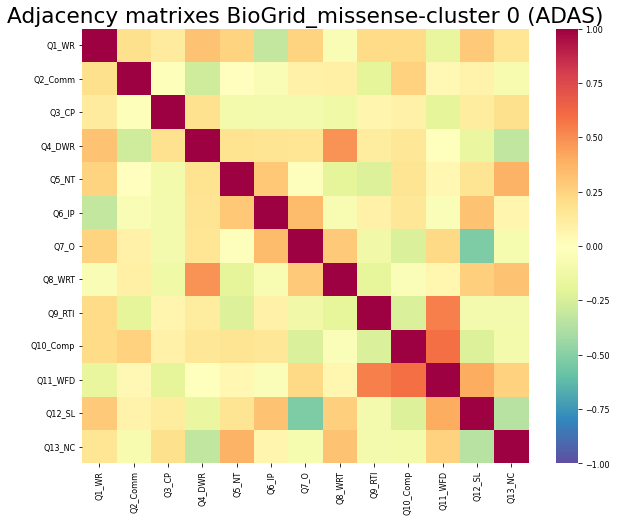

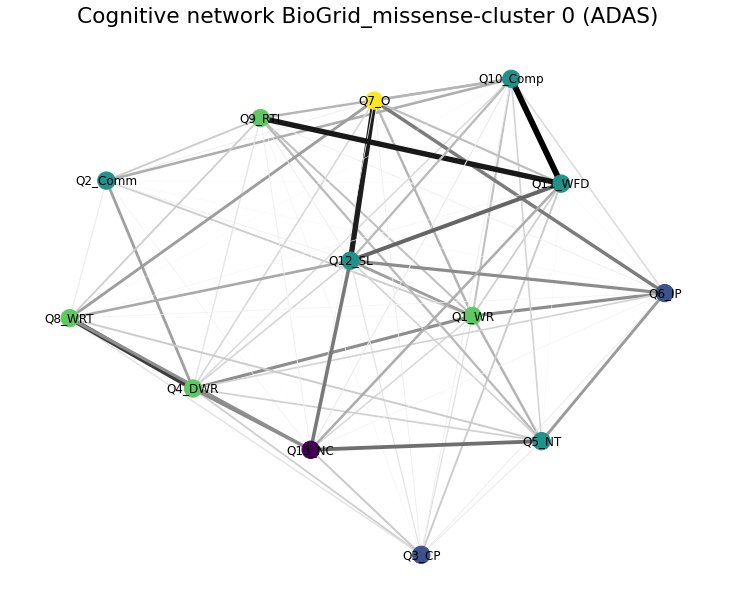

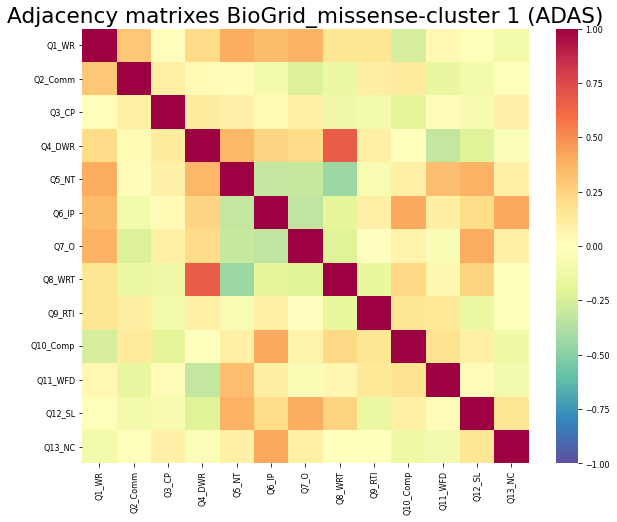

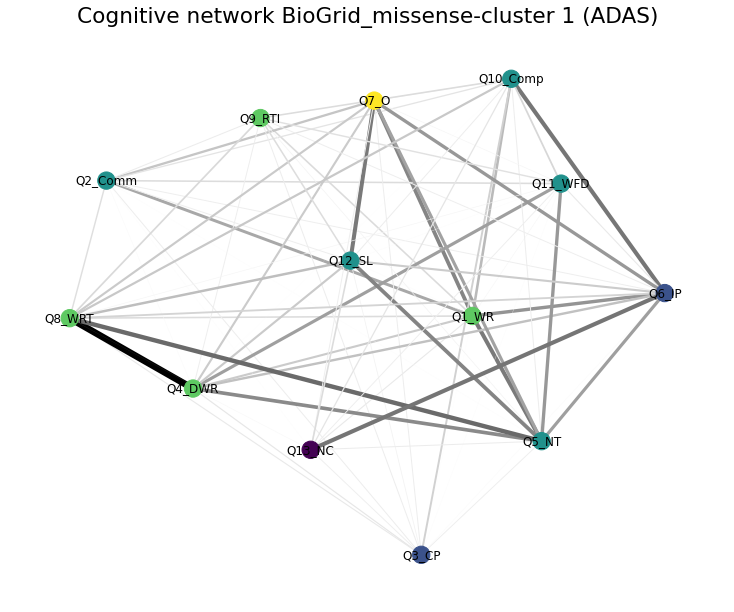

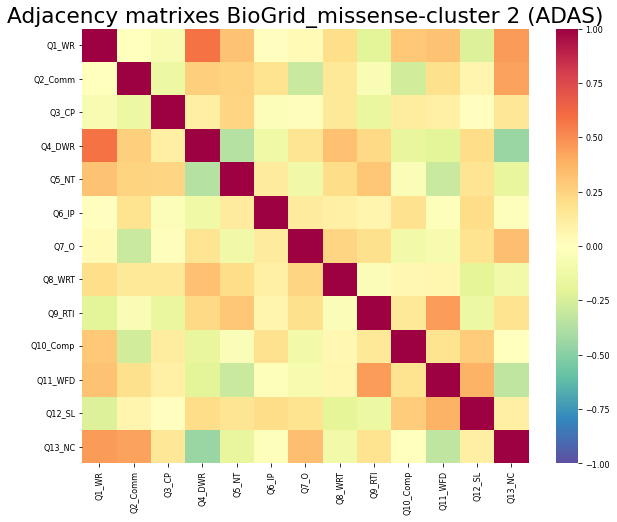

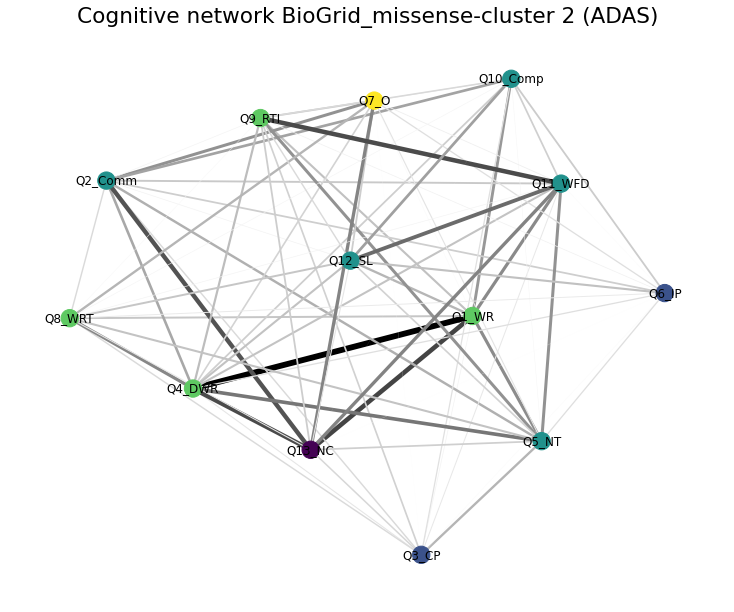

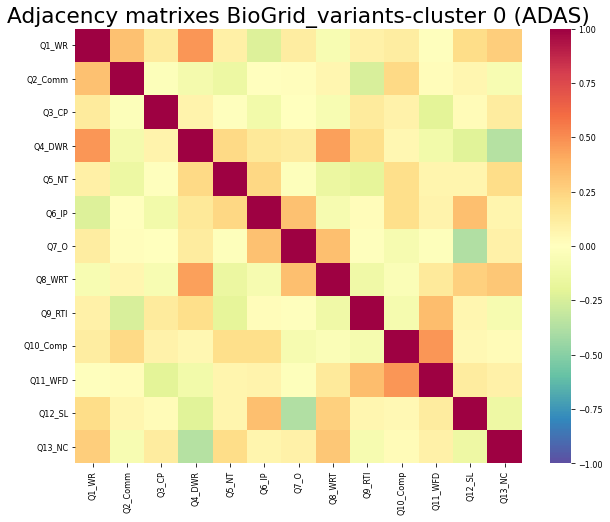

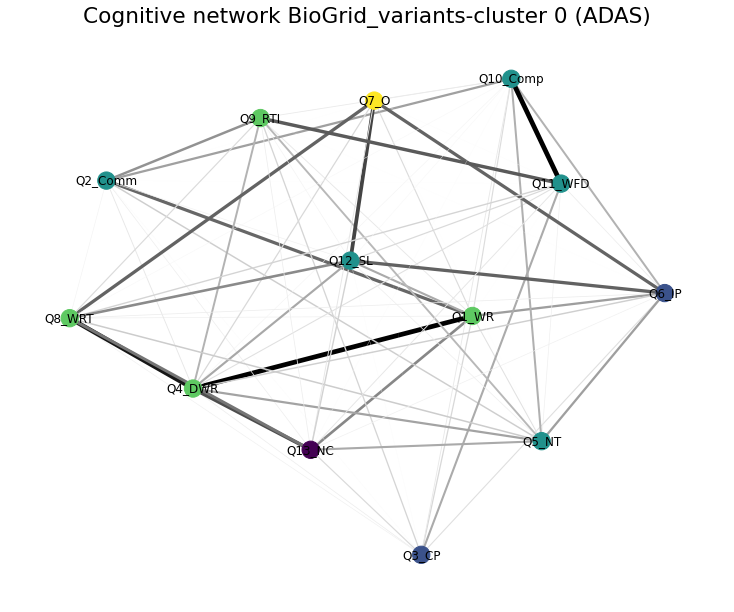

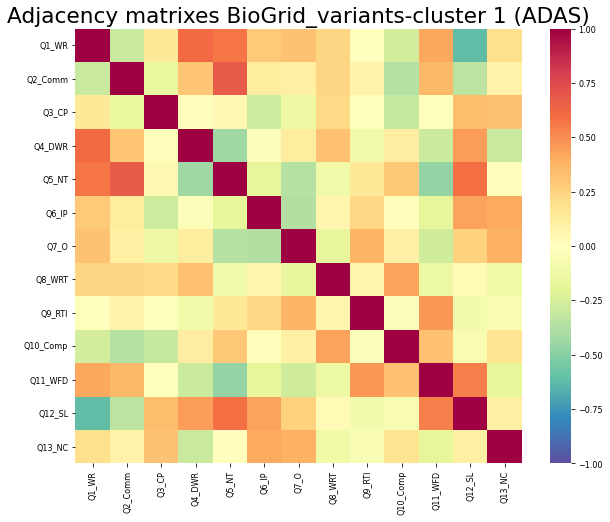

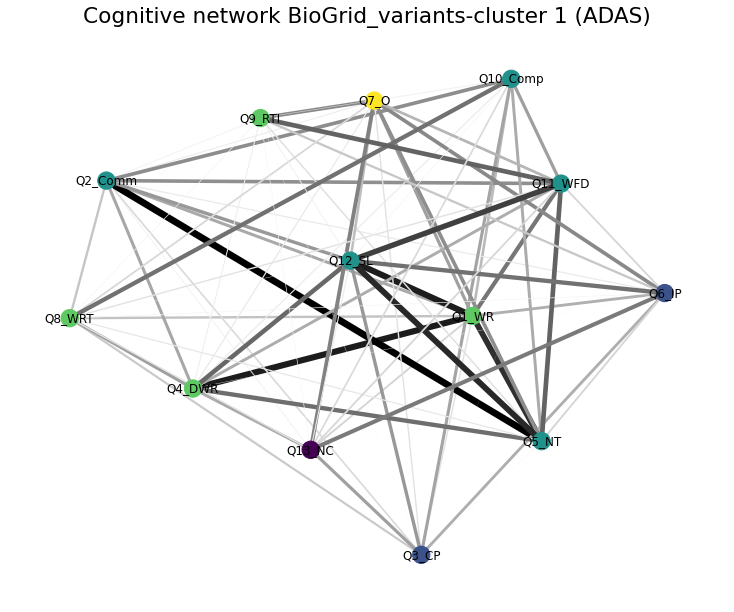

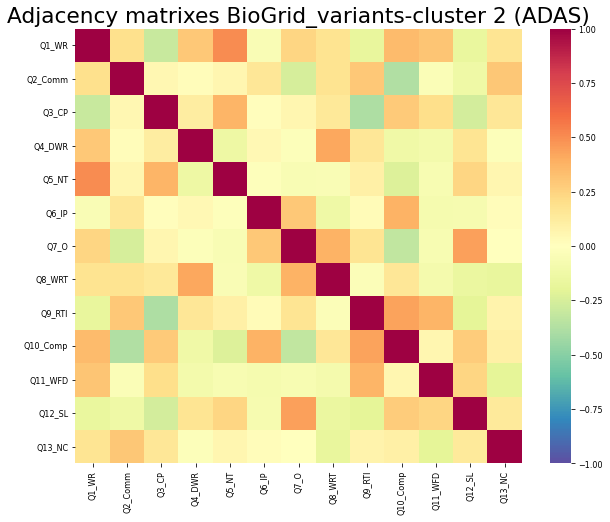

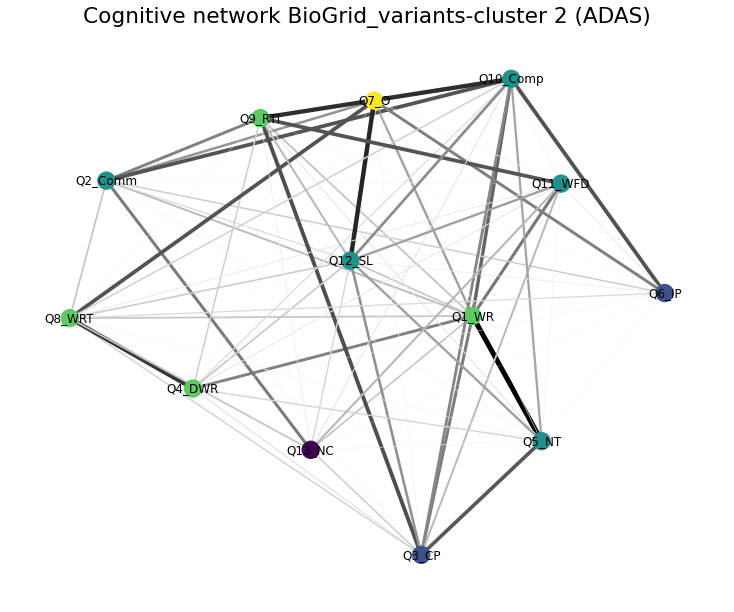

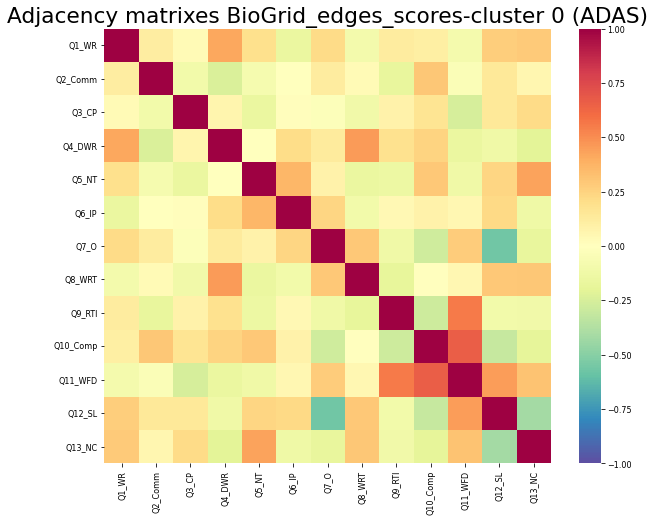

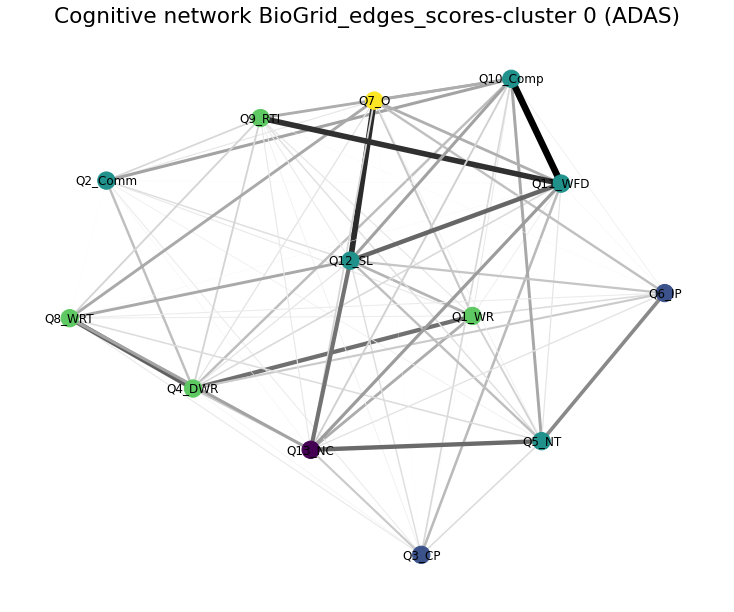

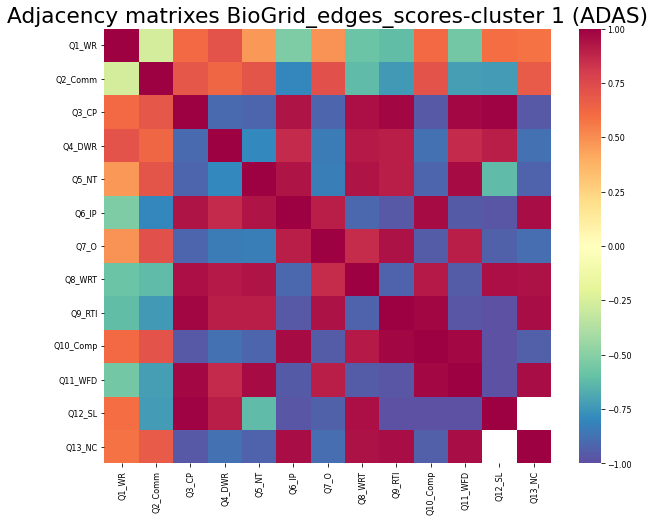

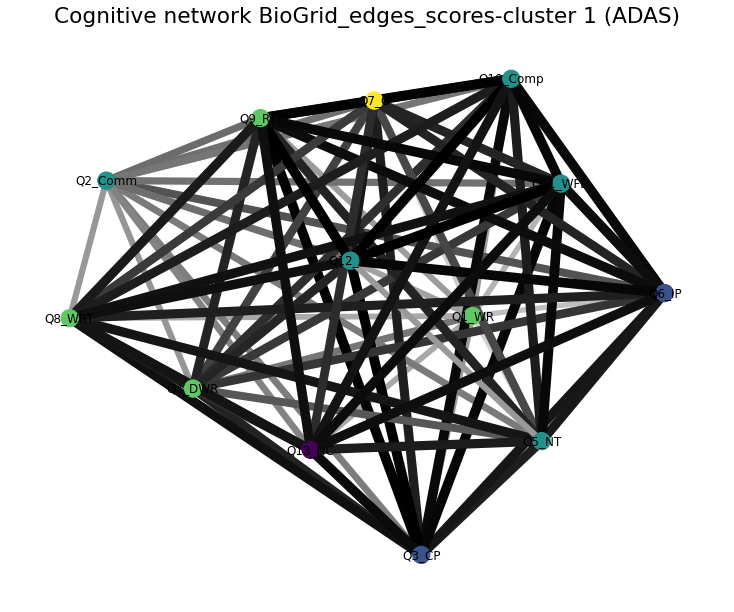

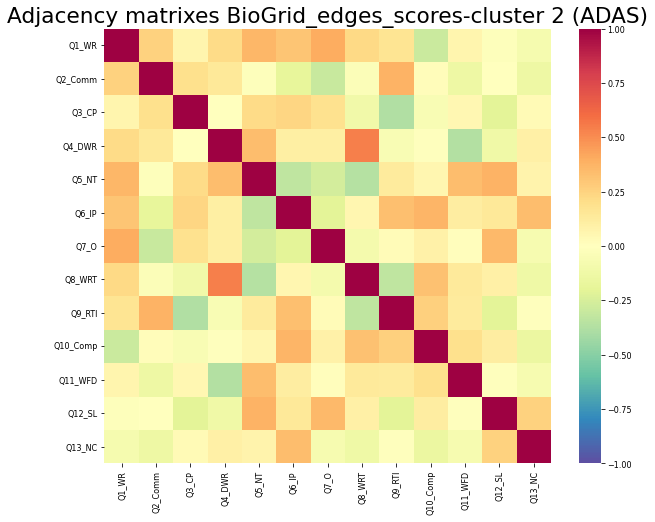

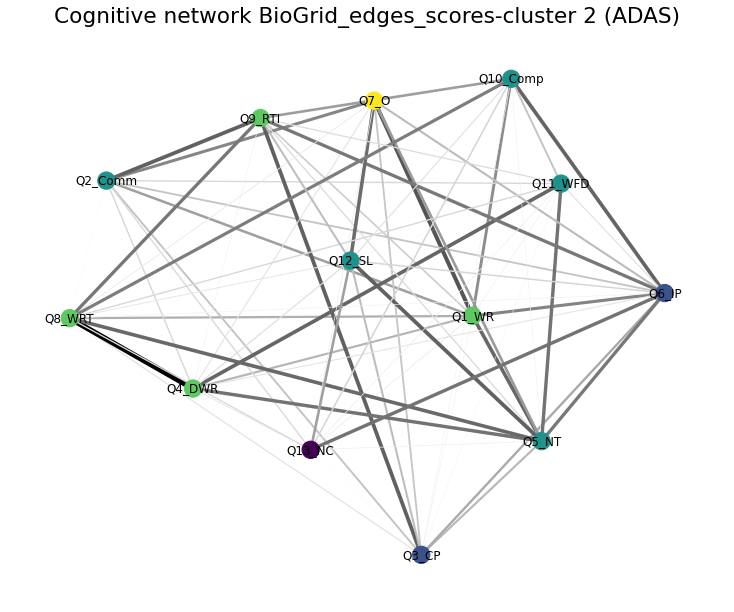

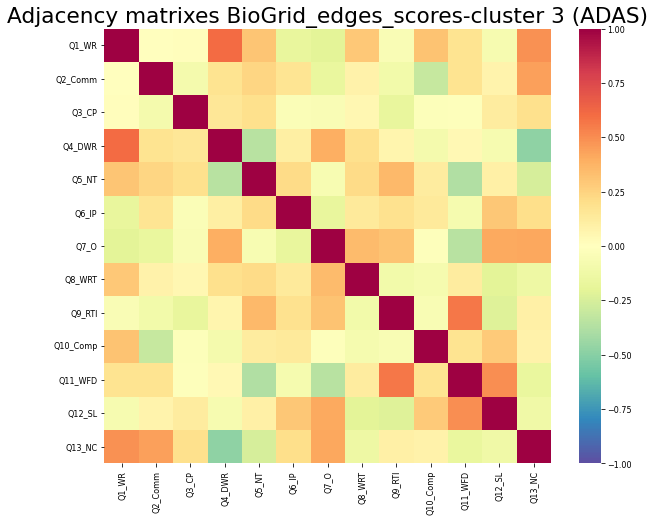

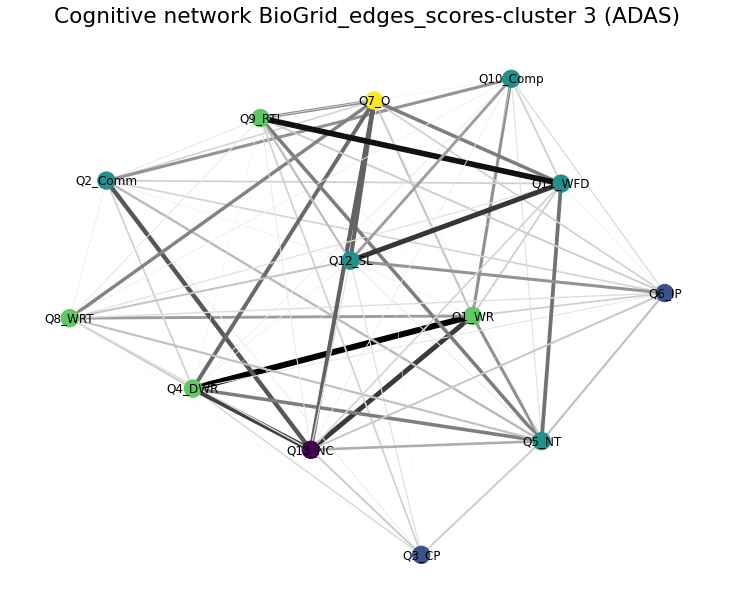

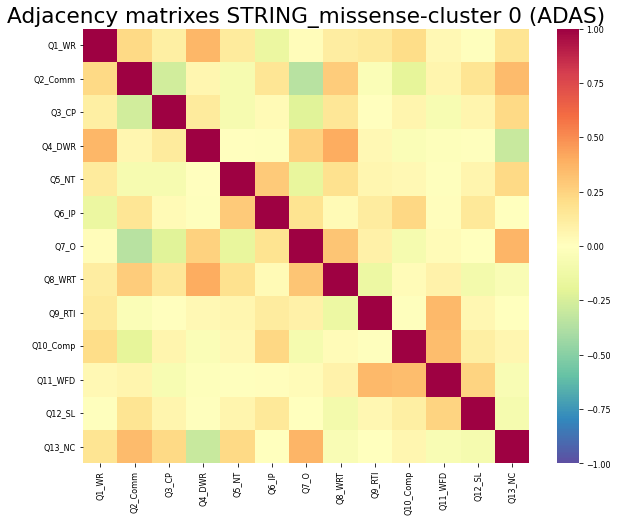

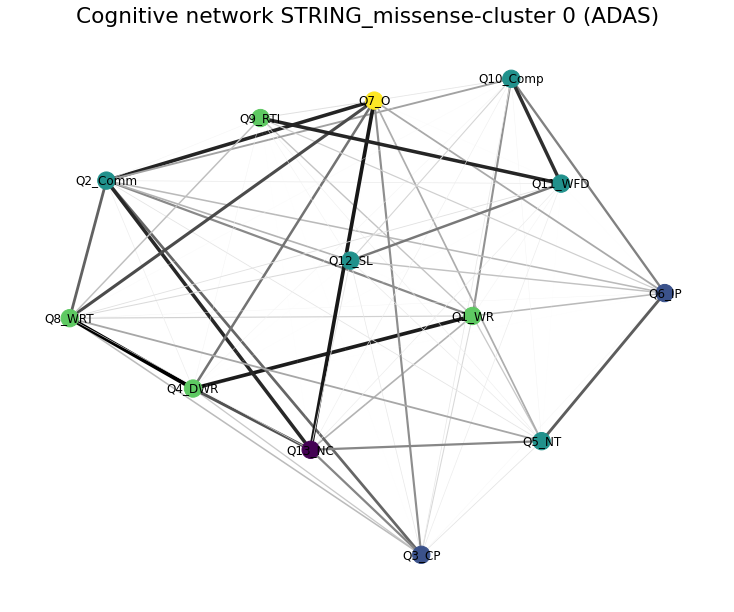

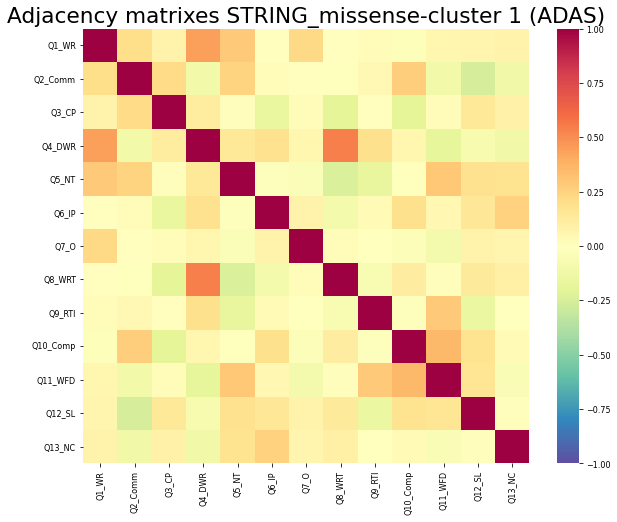

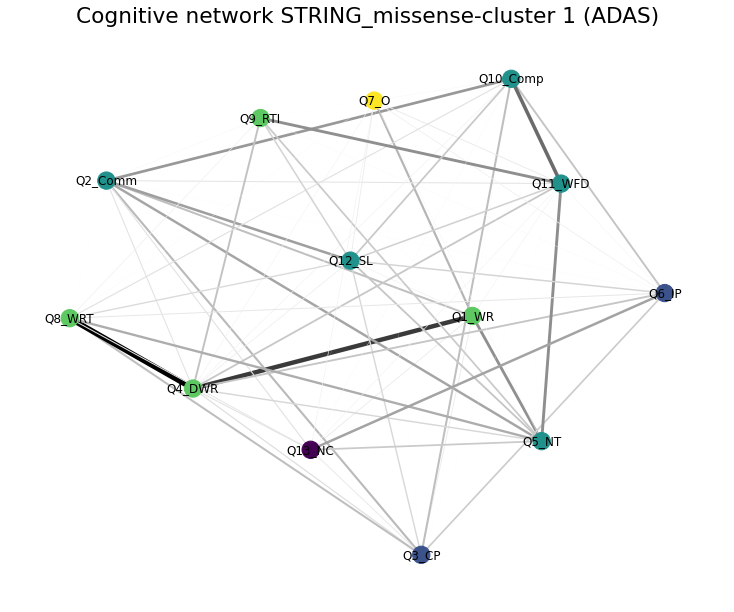

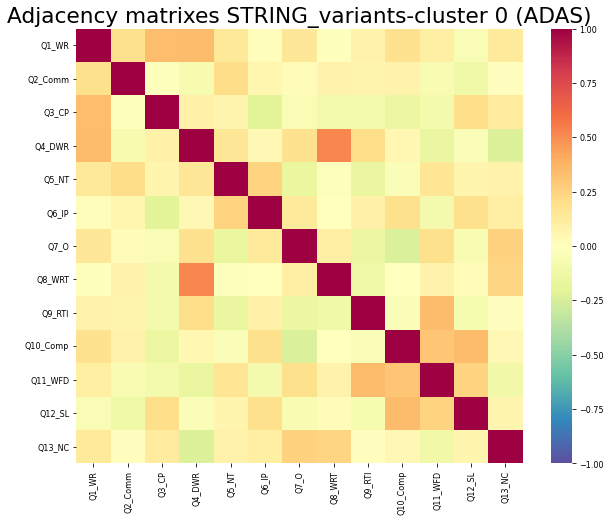

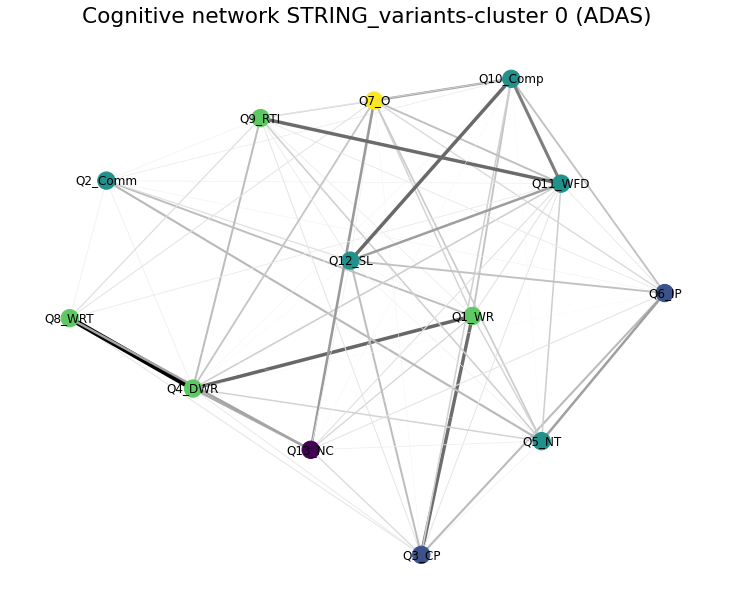

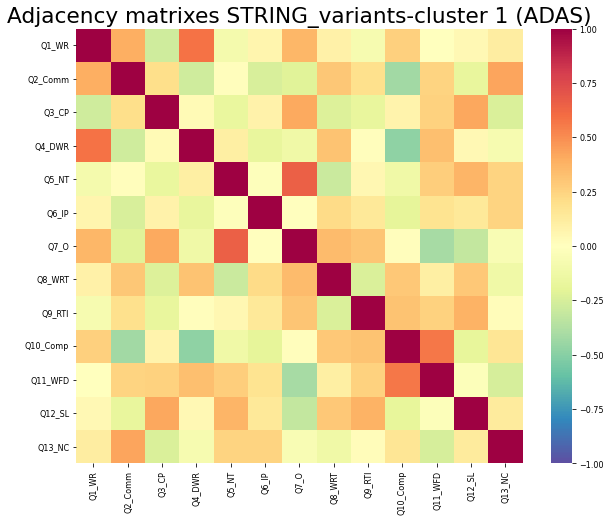

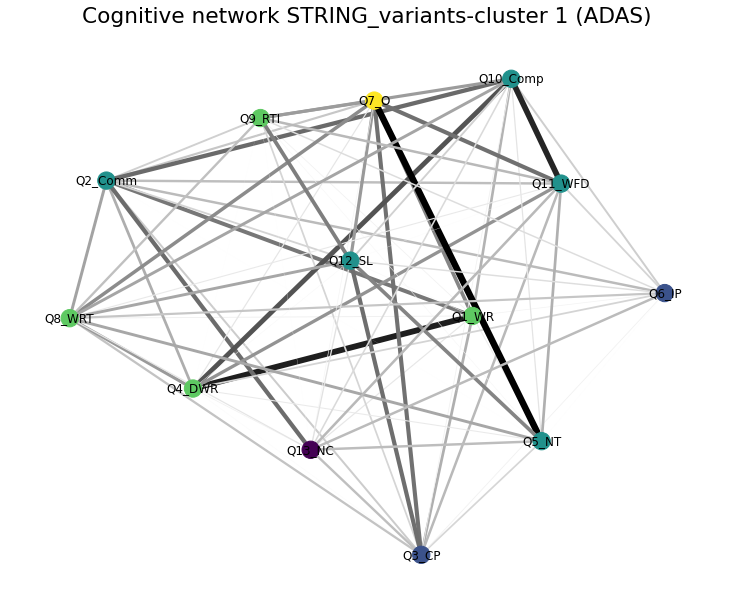

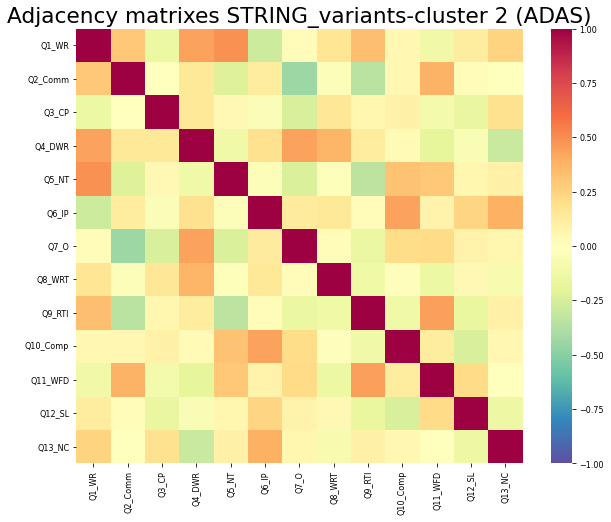

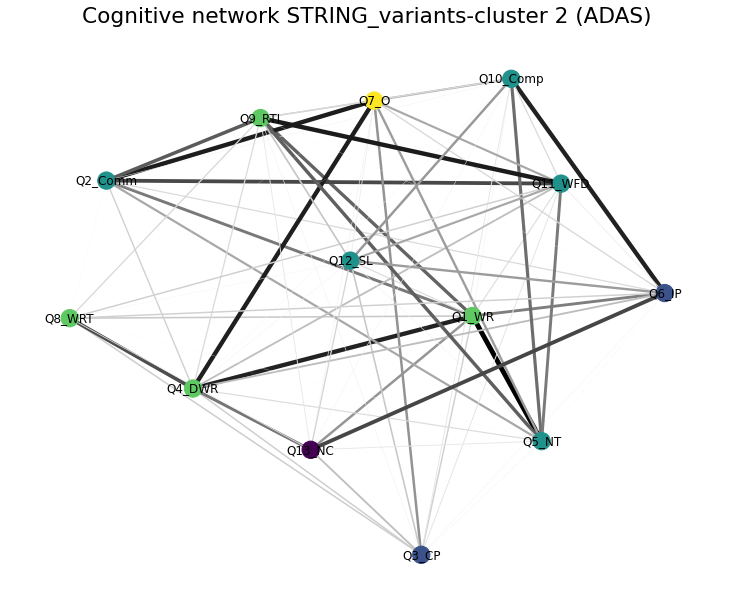

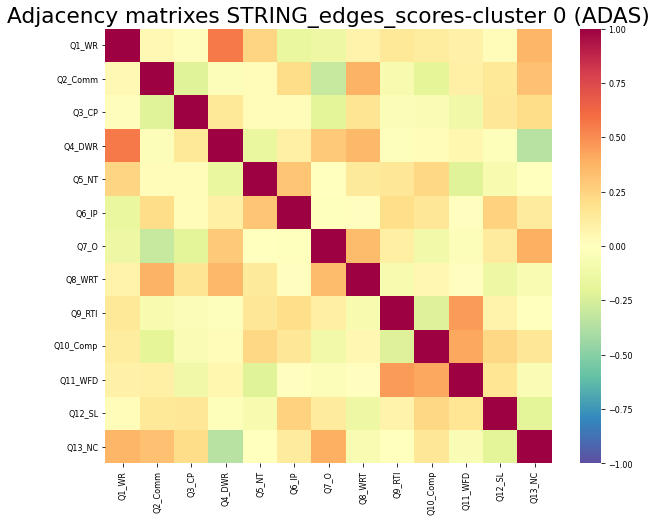

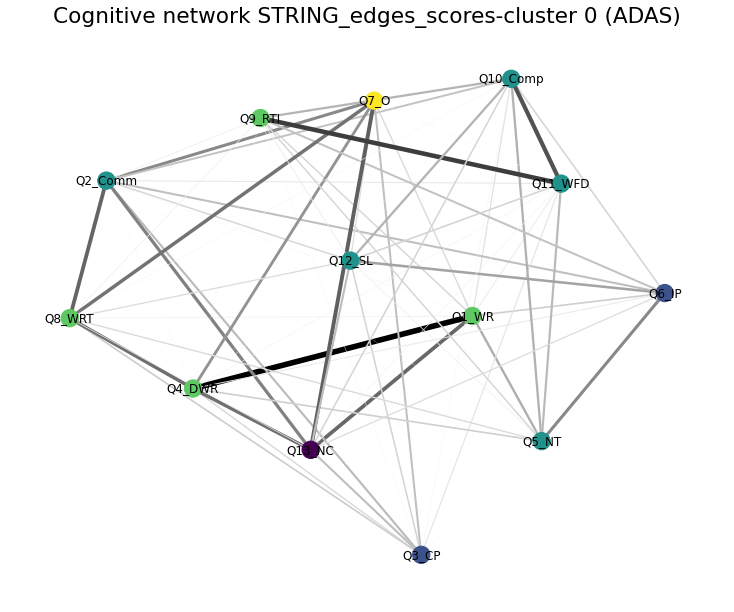

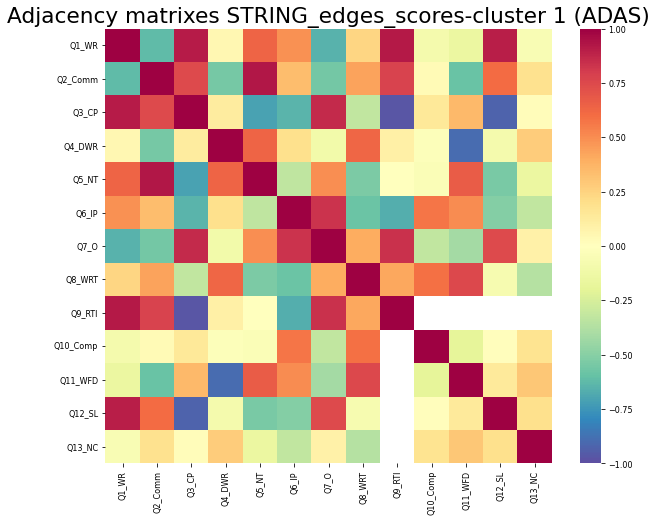

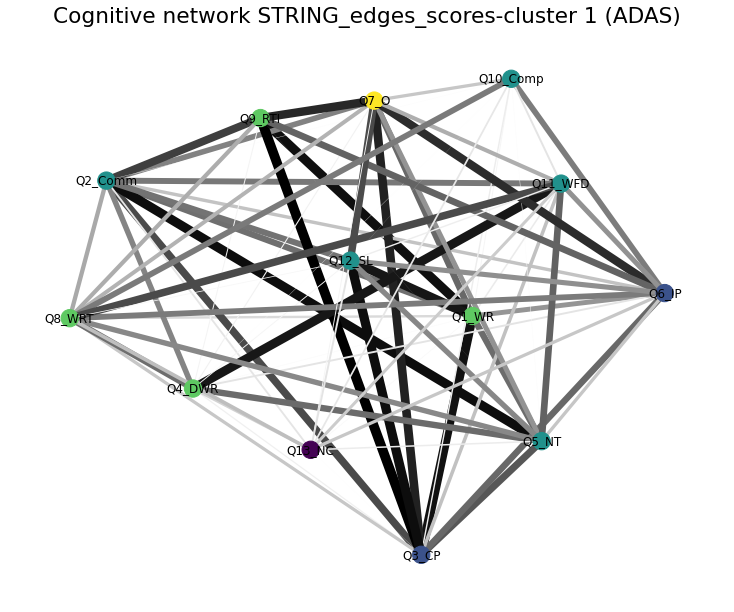

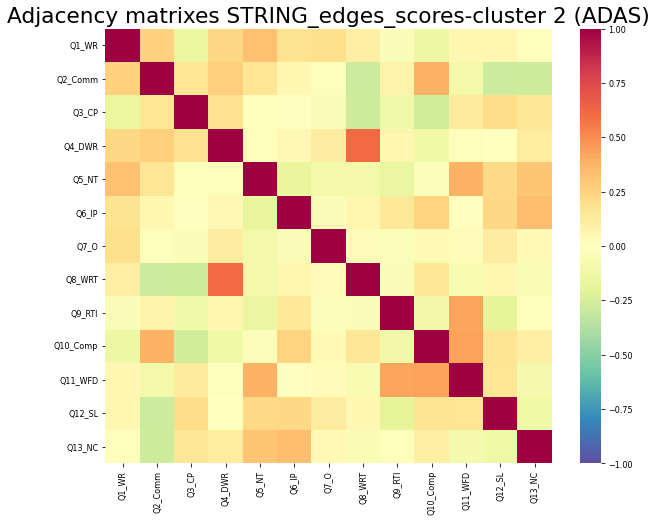

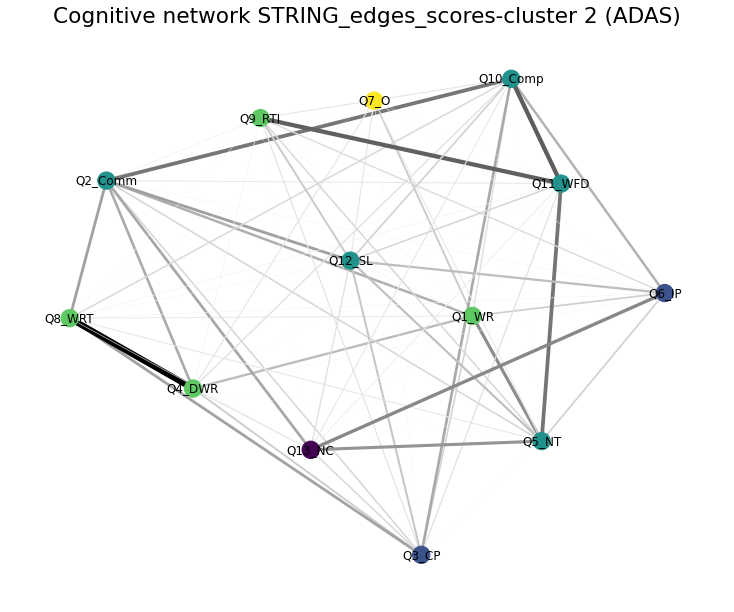

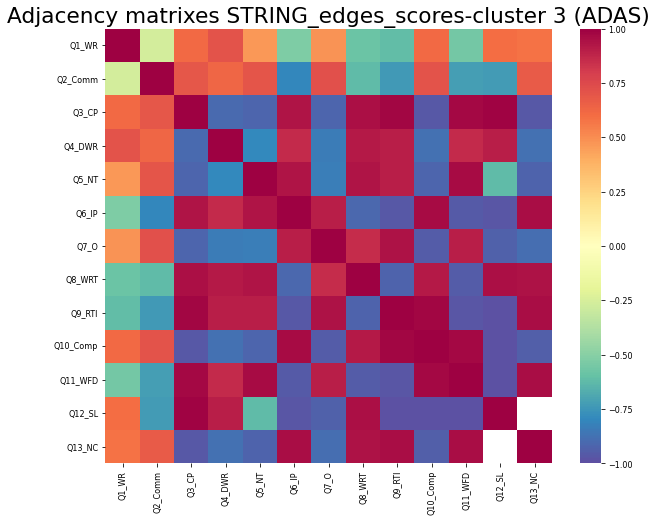

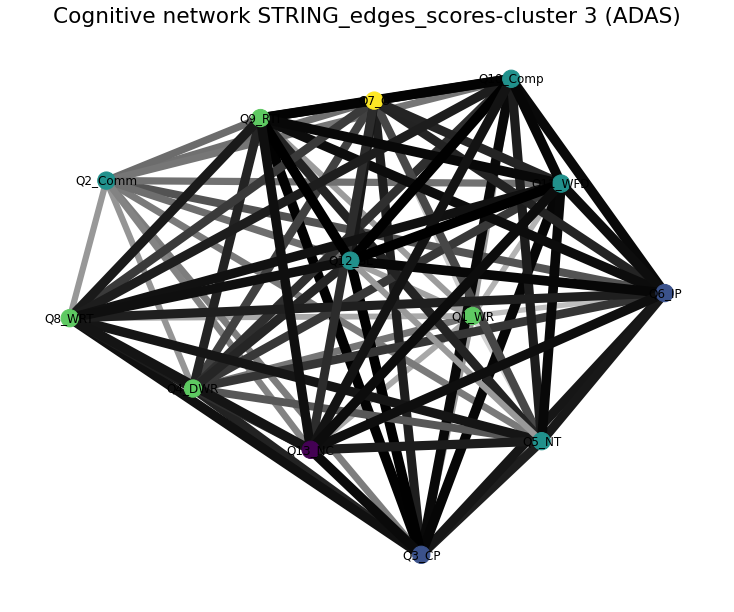

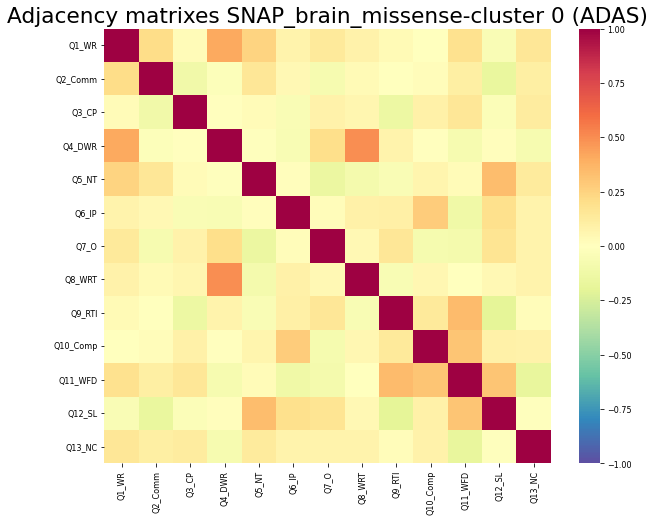

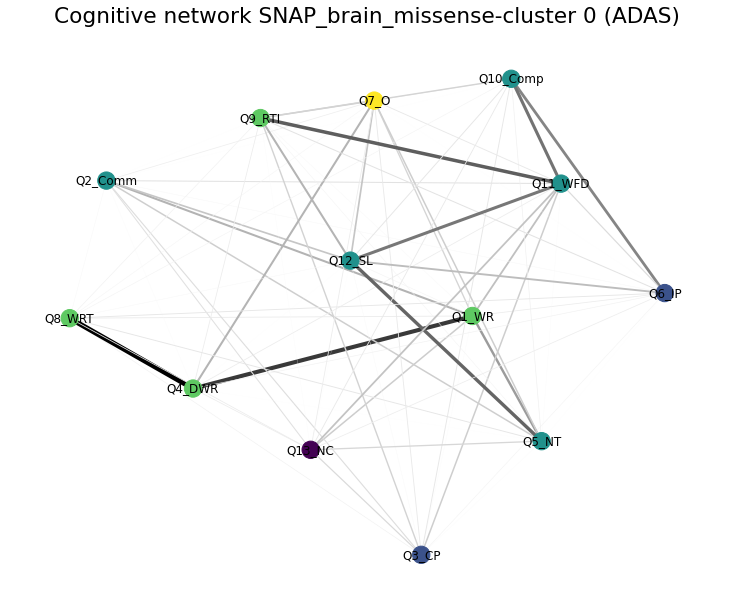

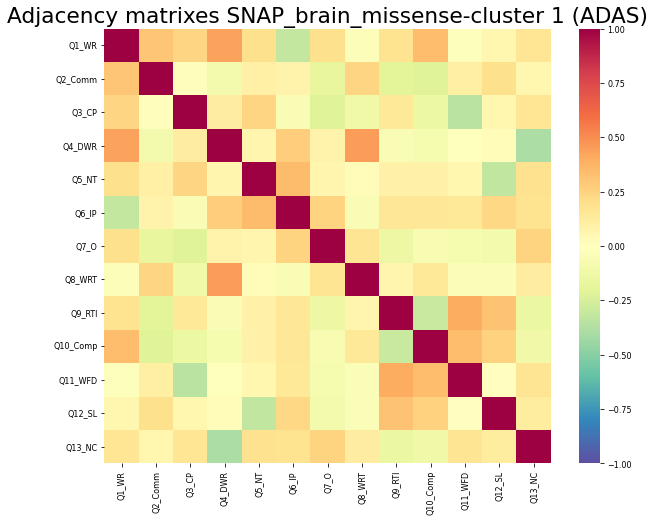

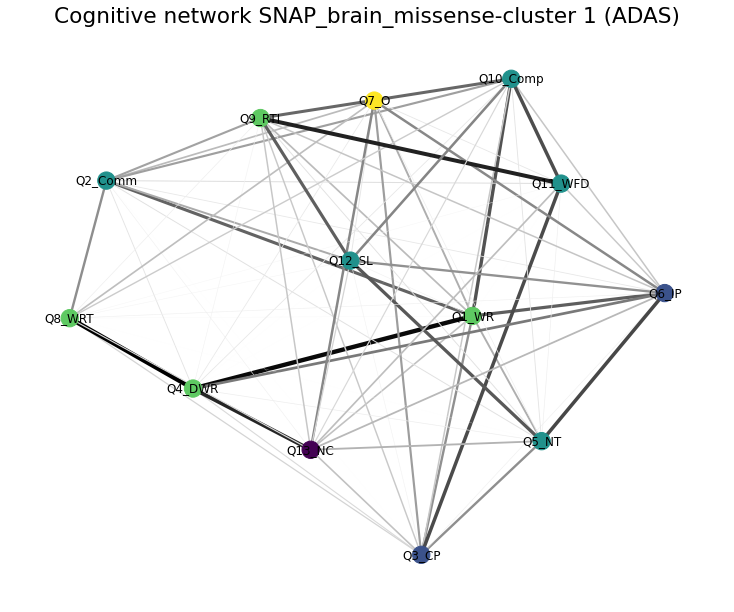

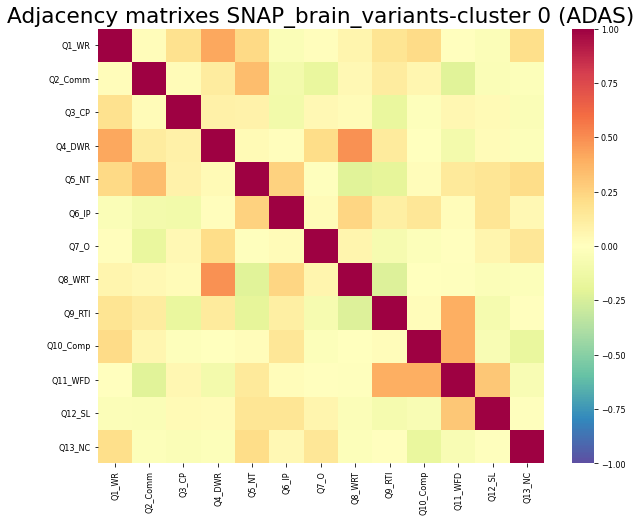

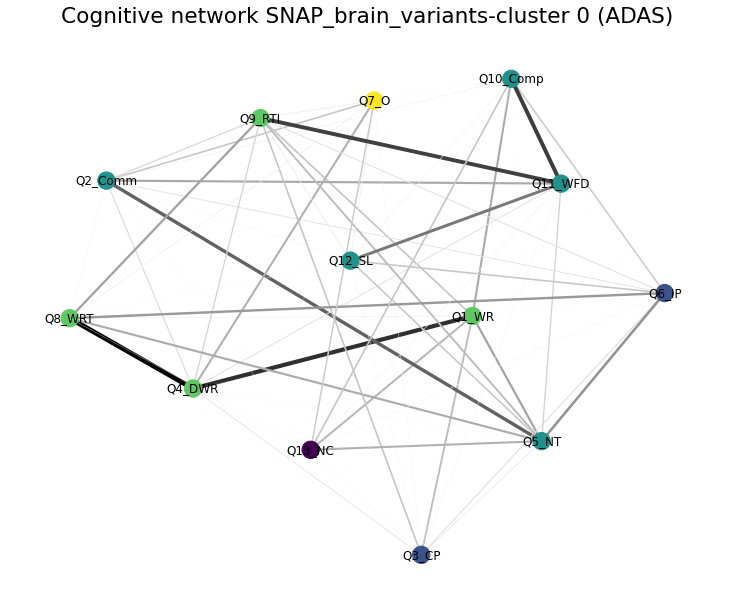

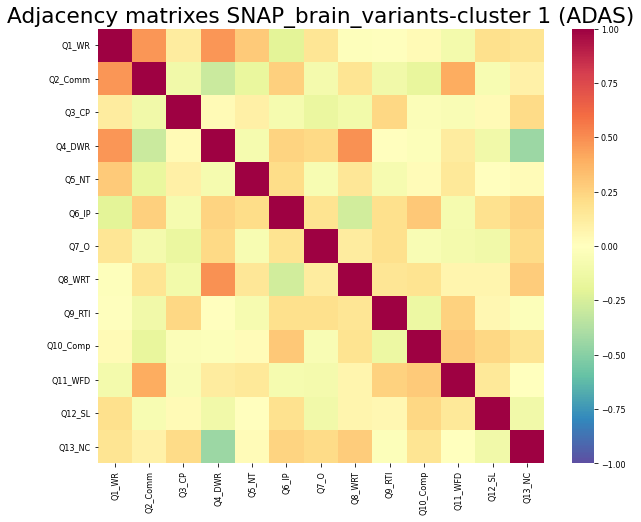

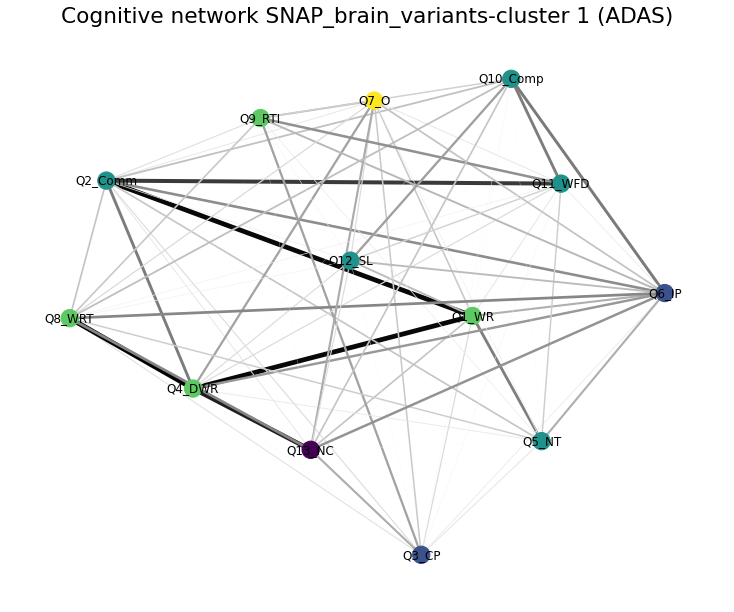

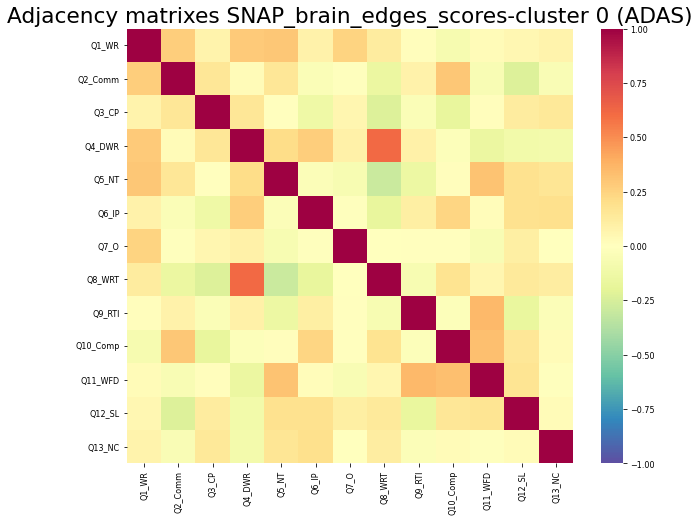

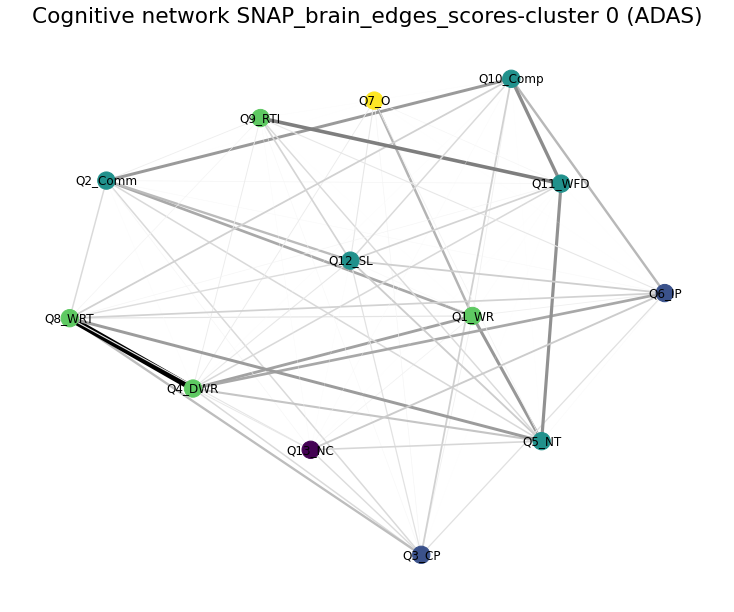

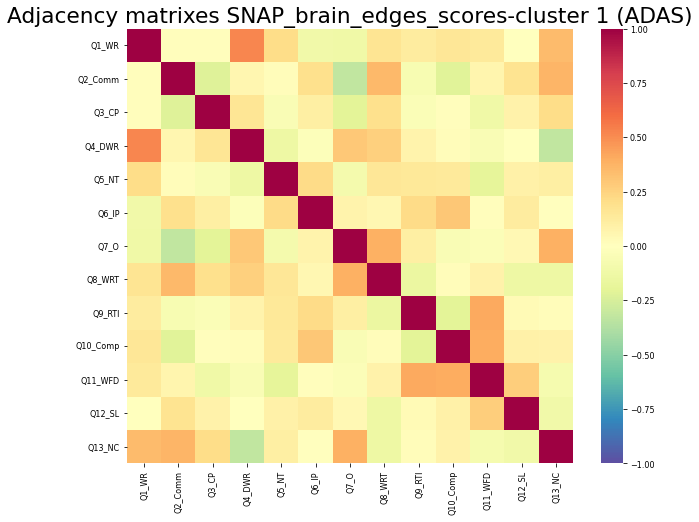

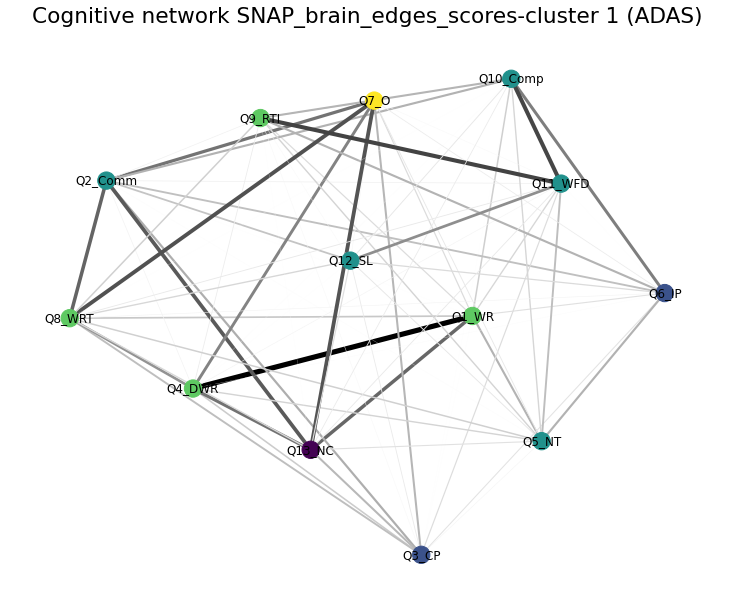

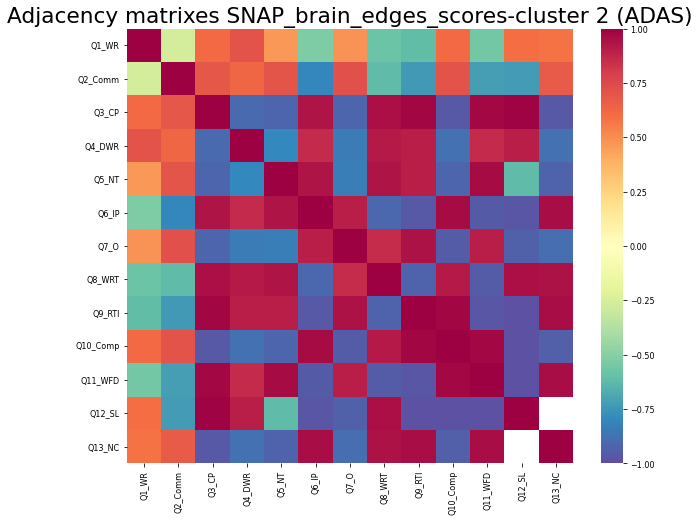

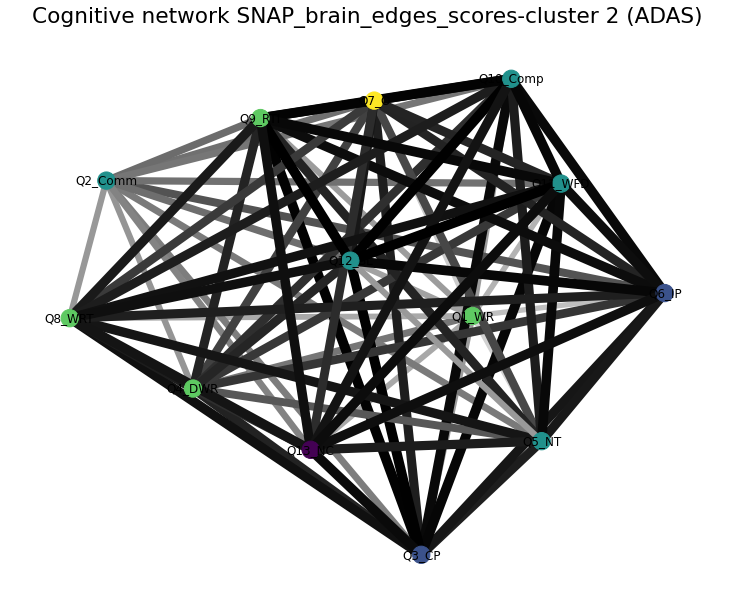

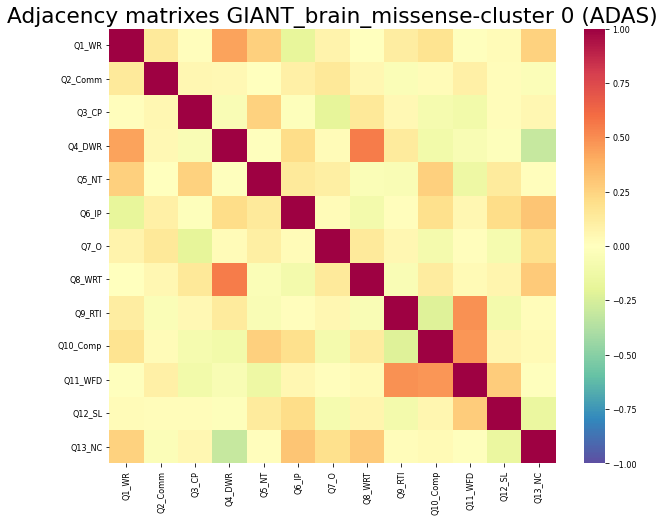

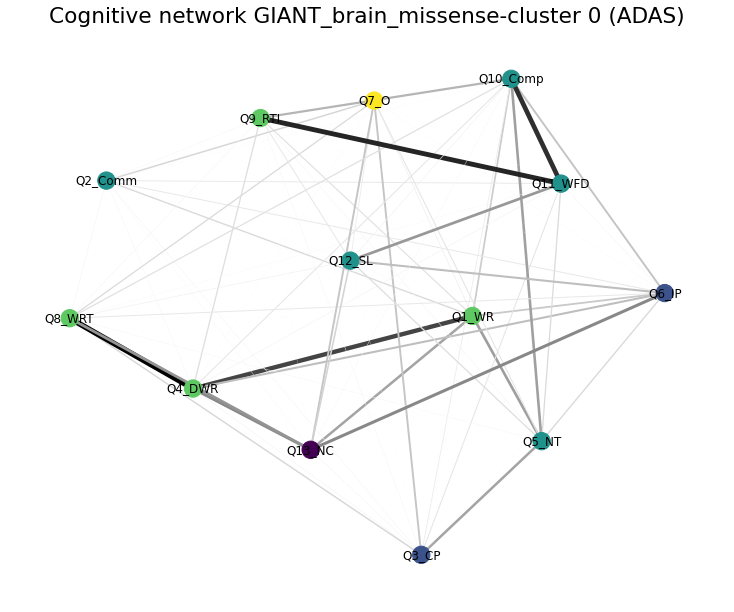

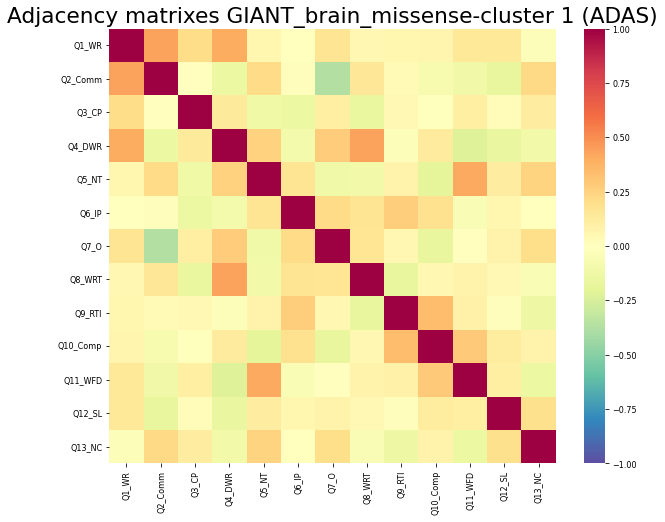

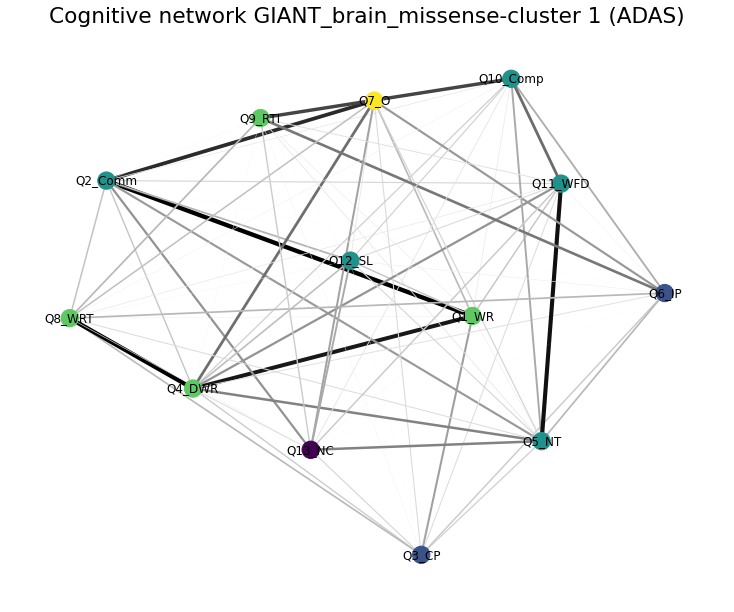

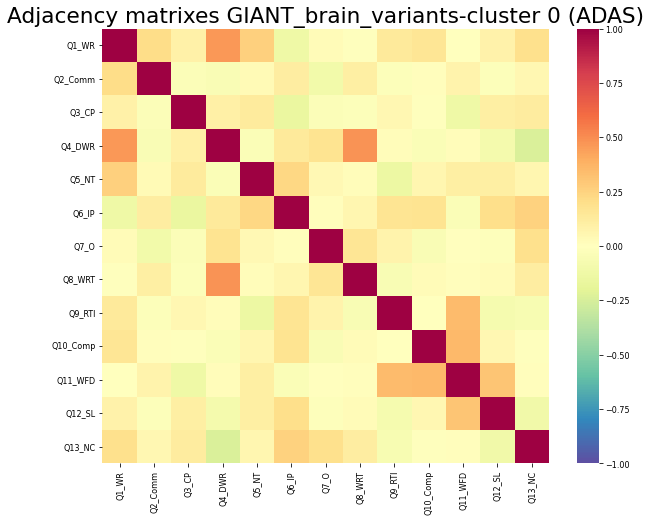

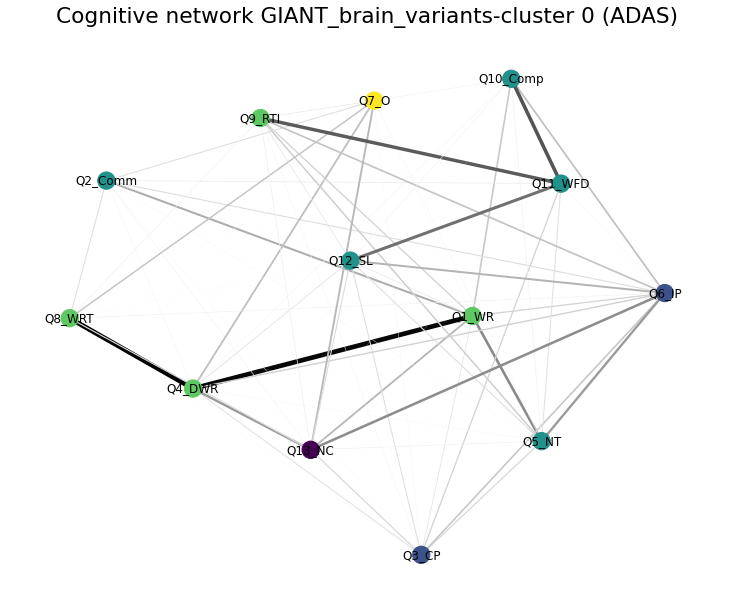

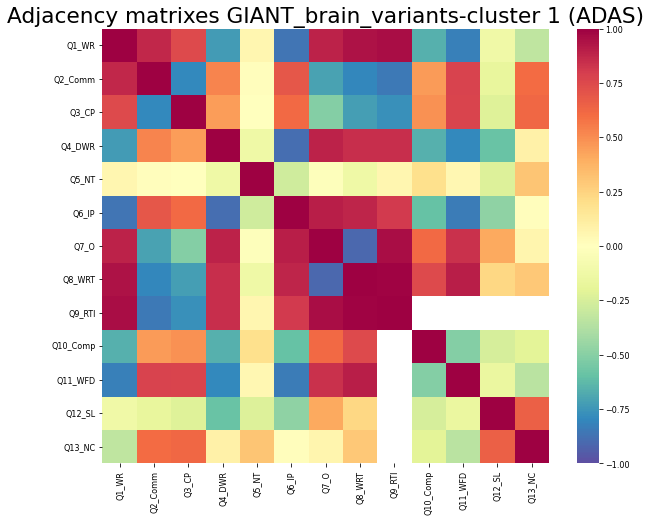

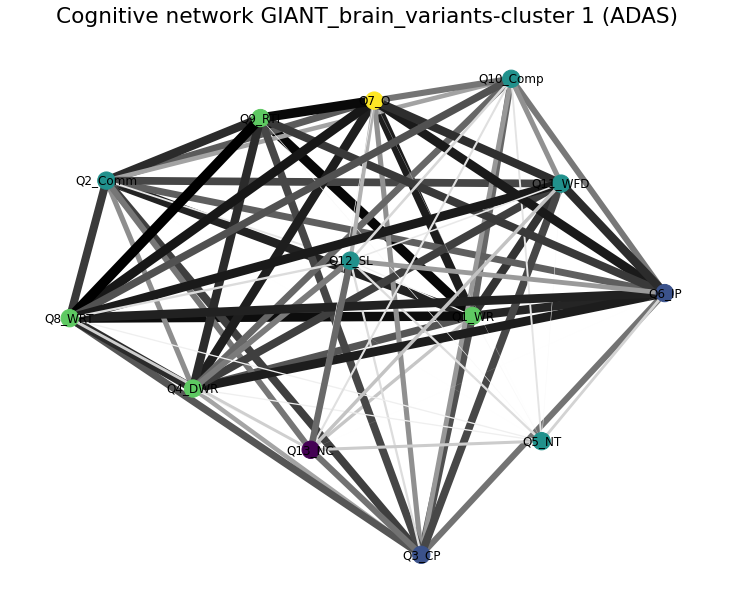

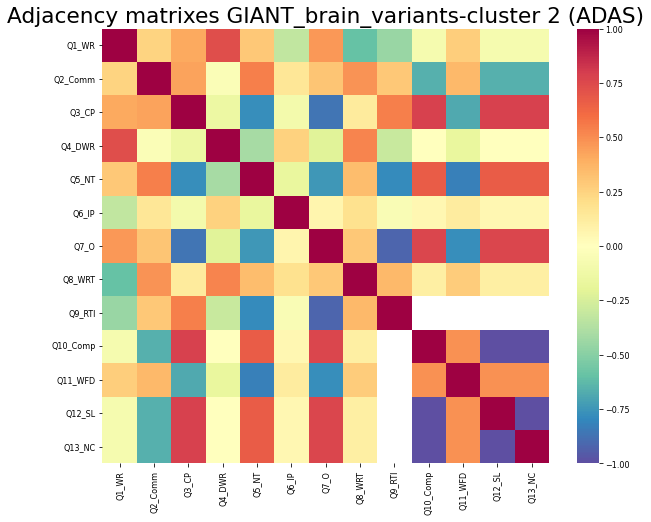

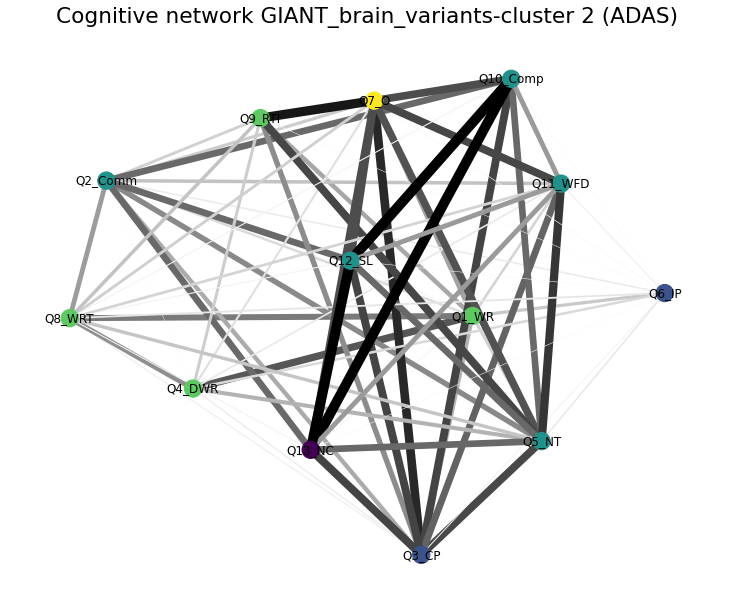

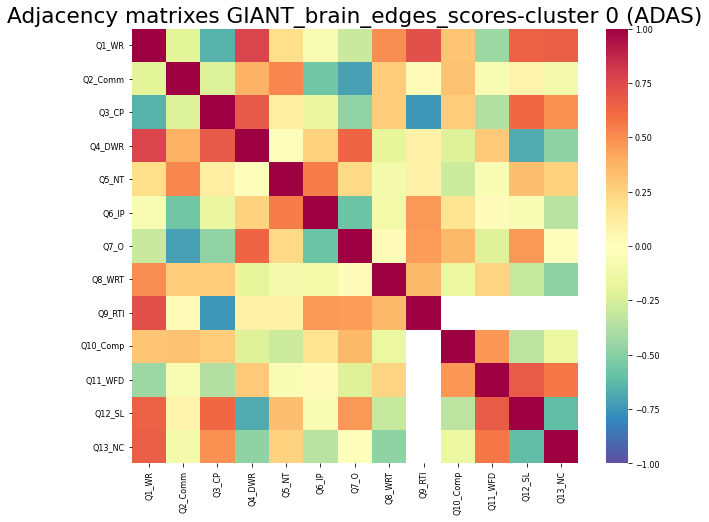

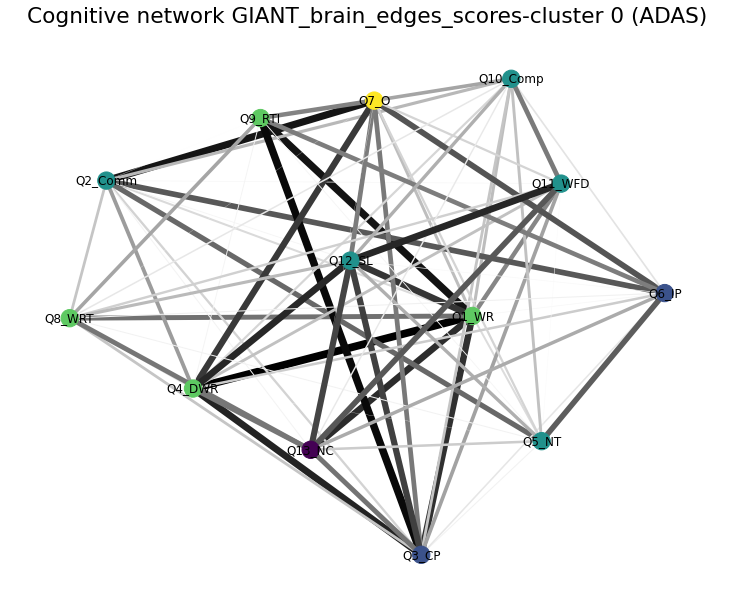

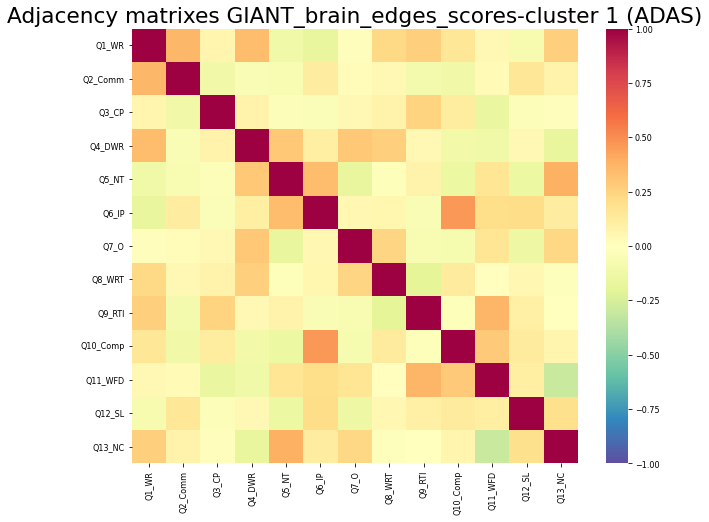

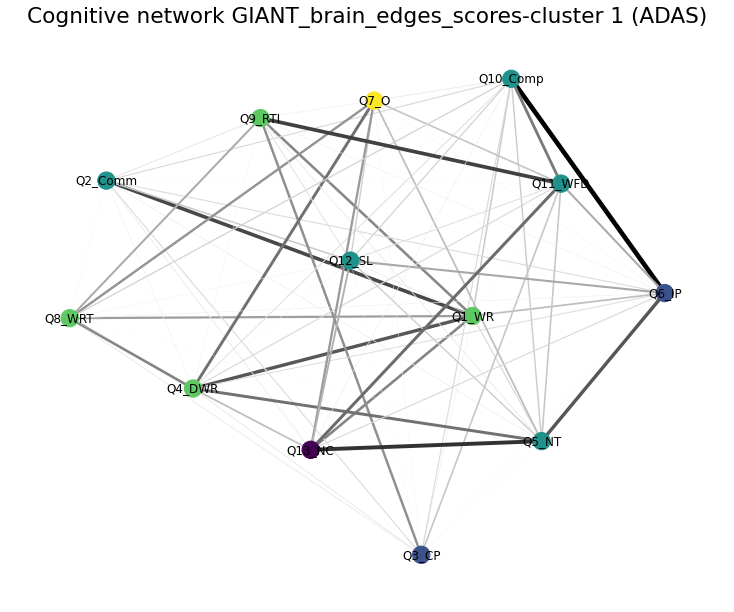

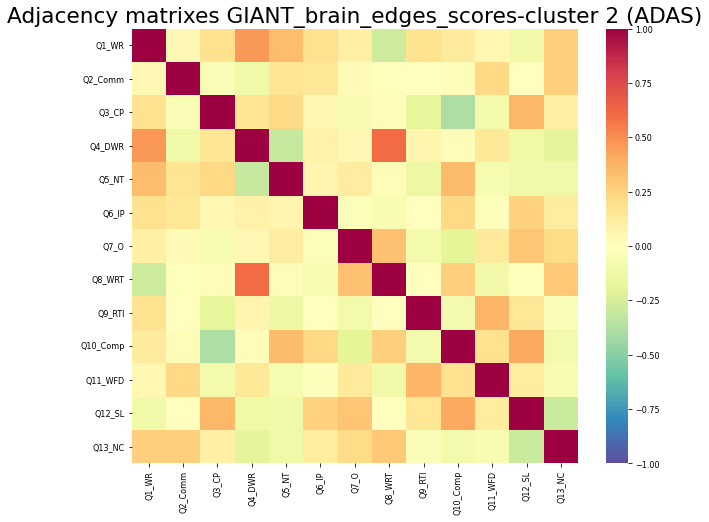

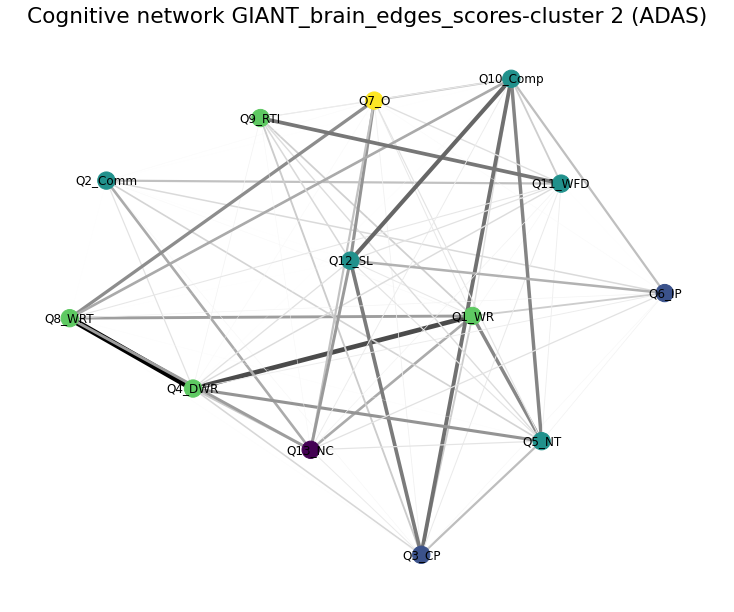

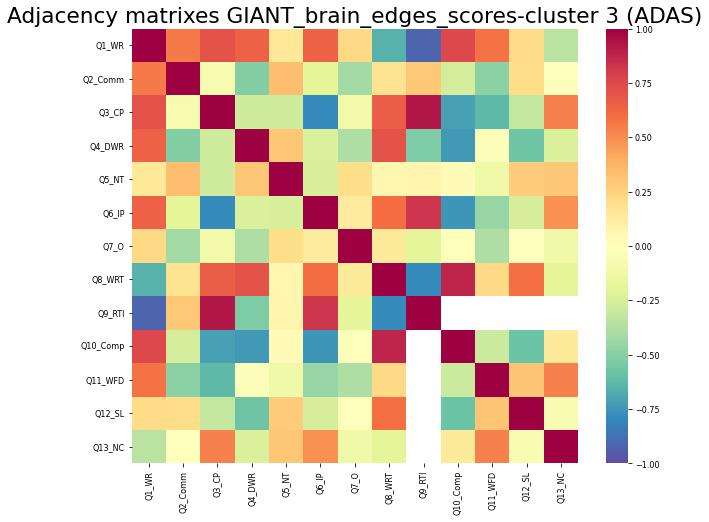

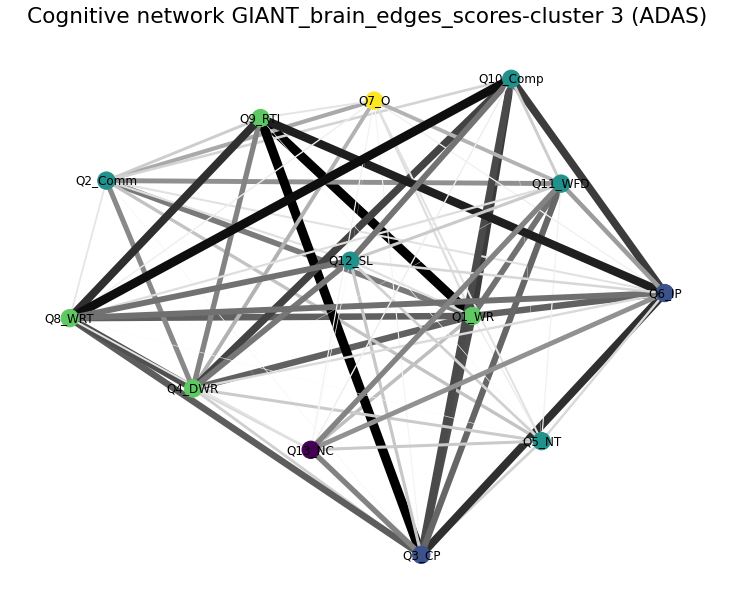

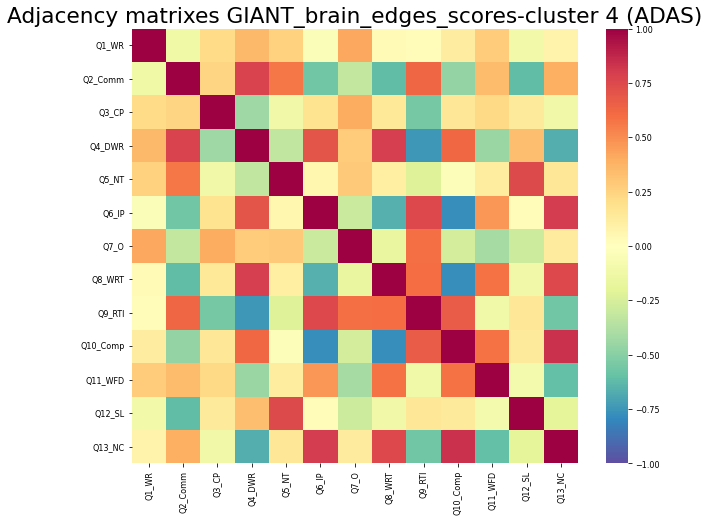

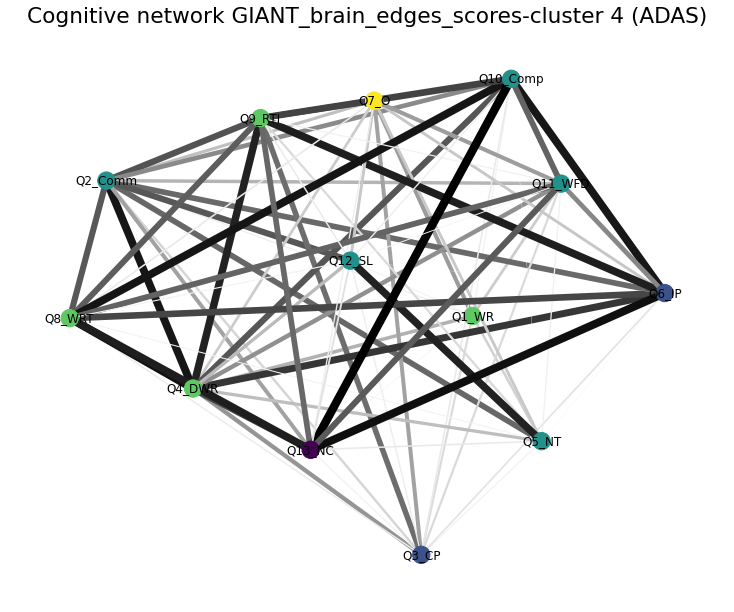

In [63]:
import warnings
warnings.filterwarnings('ignore')

pos = 0
for variable in cluster_variables: 
    print("----------------------")
    print(variable)
    print("----------------------")
    clusters_ls = list(metadata_ADAS[variable].unique()) #get list of clusters
    clusters_ls.sort() #sort clusters in ascendent order
    
    #dataframe to store global metrics for each cluster
    gm_columns = ['Cluster','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    gm_df = pd.DataFrame(columns=gm_columns) 

    #dataframe to store centrality metrics for each cluster
    cm_index = list(X_ADAS.columns)
    cm_df = pd.DataFrame(index=cm_index) 
    
    #get clusters
    for cluster in clusters_ls:
        #get the list patients of the cluster
        RID_ls = metadata_ADAS[metadata_ADAS[variable]==cluster]['RID']
        print("Number of patients in cluster", cluster, ": ", len(RID_ls))
        
        #filter test data table by RID
        RID_indexes = metadata_ADAS[metadata_ADAS['RID'].isin(RID_ls)]['RID']
        RID_indexes=list(RID_indexes.index)
        X = X_ADAS.iloc[RID_indexes]
        
        #ADJACENCY MATRIX -----------------------------------------------------
        #get adjacency matrix
        mx = par_corr(X)
        plot_adjacency_mx(mx, variable, cluster, 'ADAS')
        
        #COGNITIVE NETWORK ----------------------------------------------------
        #get graphs
        graph = cognitive_network(mx) #convert corr coefficients into absolute values
        metadata_path = "./NC_Tests/ADAS_Metadata.csv"
        node_attributes(metadata_path, graph, X)
        #Node labels
        labels = {} #create empty dictionary
        for i in range(mx.shape[1]):
            labels[i] = mx.columns[i]

        #convert domains into numeric keys
        mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4} 

        #fix position
        if pos ==0:
            pos=nx.spring_layout(graph, weight='weight', seed=0)

        draw_graph(graph, labels, pos, mapping, 'ADAS', variable, cluster)
        
        #GRAPH METRICS -------------------------------------------------------
        #Global metrics
        gm_df = global_metrics(gm_df,graph,cluster)
        #Centrality metrics
        cm_df = centrality(cm_df,graph,cluster)
        
    #export metrics
    gm_filepath = "./Genetic-Clusters/Results/ADAS/" + variable +"/globalMetrics.csv"
    gm_df.to_csv(gm_filepath, index=False, sep=";")
    cm_filepath = "./Genetic-Clusters/Results/ADAS/" + variable +"/centralityMetrics.csv"
    cm_df.to_csv(cm_filepath, index=True, sep=";") 